___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

**WELCOME!**

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


**Determines**

The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


## Tasks

### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


In [1]:
# # setup and restart
# !pip install matplotlib -Uq

# 1. Exploratory Data Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import gdown
# same as the above, but with the file ID
id = "17YTKGaSbl8KyAu-OENrDnWBVcUYDY_EQ" # id: Womens Clothin...csv
output = 'Womens Clothing E-Commerce Reviews.csv' # download colab
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17YTKGaSbl8KyAu-OENrDnWBVcUYDY_EQ
To: /content/Womens Clothing E-Commerce Reviews.csv
100%|██████████| 8.48M/8.48M [00:00<00:00, 20.7MB/s]


'Womens Clothing E-Commerce Reviews.csv'

## Import Libraries, Load and Discover the Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.image import imread

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
random_state = 101

## Data Wrangling

In [6]:
df_original = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df = df_original.copy()
df

Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 11 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


## Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [8]:
df["Recommended IND"].value_counts(normalize=True)

1   0.822
0   0.178
Name: Recommended IND, dtype: float64

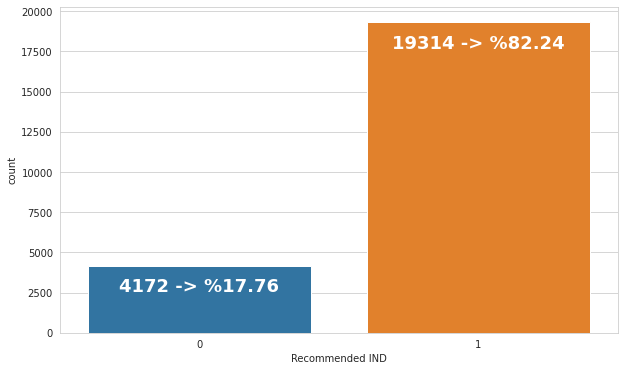

In [9]:
g = sns.countplot(data =df, x = "Recommended IND")
for c in g.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    # labels = [f'{h} -> %{100*(h/df["Recommended IND"].count()):0.2f}' if (h:=v.get_height()) > 0 else '' for v in c] # new code not work colab
    labels = [f'{v.get_height()} -> %{100*(v.get_height()/df["Recommended IND"].count()):0.2f}' if v.get_height() > 0 else '' for v in c]
    g.bar_label(c, labels=labels, padding=-30, fontsize=18, weight='bold', color='w', rotation=0)

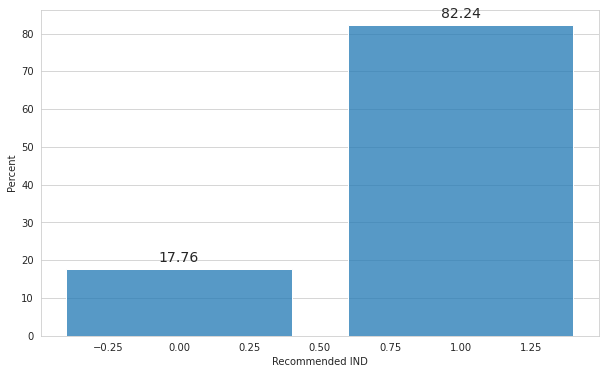

In [10]:
g = sns.histplot(df['Recommended IND'], discrete=True, stat='percent', shrink=.8, kde=False)
g.bar_label(g.containers[0], fmt='%.2f', padding=4, fontsize=14);
g.grid(axis='x')

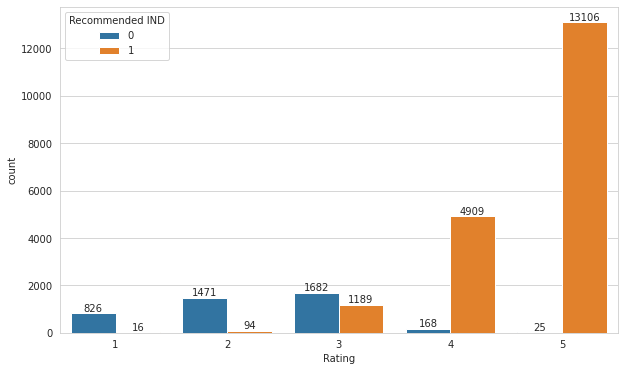

In [11]:
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

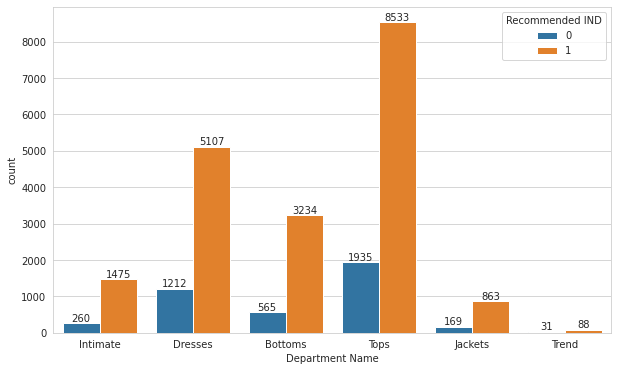

In [12]:
ax = sns.countplot(data =df, x = "Department Name", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

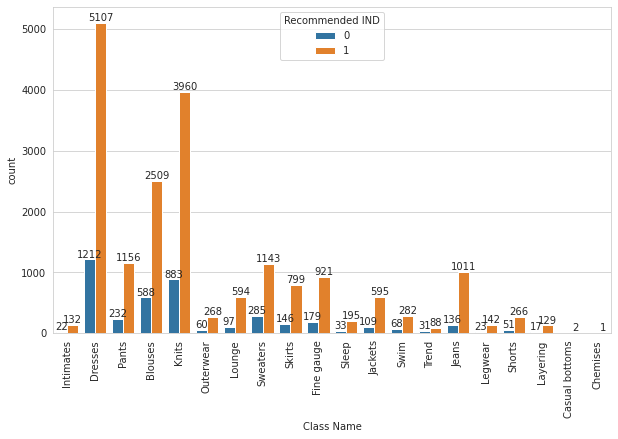

In [13]:
ax = sns.countplot(data =df, x = "Class Name", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation = 90);

# 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



## Feature Selection and Rename Column Name

In [14]:
df = pd.DataFrame(df[["Recommended IND", "Review Text"]].values, columns=['recommended', 'text'])
df.head()

recommended                                               text
0           1  Absolutely wonderful - silky and sexy and comf...
1           1  Love this dress!  it's sooo pretty.  i happene...
2           0  I had such high hopes for this dress and reall...
3           1  I love, love, love this jumpsuit. it's fun, fl...
4           1  This shirt is very flattering to all due to th...

In [15]:
df['not_recommended'] = df['recommended'].map({0 : 1, 1: 0})
df

recommended                                               text  \
0               1  Absolutely wonderful - silky and sexy and comf...   
1               1  Love this dress!  it's sooo pretty.  i happene...   
2               0  I had such high hopes for this dress and reall...   
3               1  I love, love, love this jumpsuit. it's fun, fl...   
4               1  This shirt is very flattering to all due to th...   
...           ...                                                ...   
23481           1  I was very happy to snag this dress at such a ...   
23482           1  It reminds me of maternity clothes. soft, stre...   
23483           0  This fit well, but the top was very see throug...   
23484           1  I bought this dress for a wedding i have this ...   
23485           1  This dress in a lovely platinum is feminine an...   

       not_recommended  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  
...                ...  
23481                0  
23482                0  
23483                1  
23484                0  
23485                0  

[23486 rows x 3 columns]

---
---


## Missing Value Detection

In [16]:
df.isna().sum()

recommended          0
text               845
not_recommended      0
dtype: int64

In [17]:
df = df.dropna().reset_index(drop=True)
df

recommended                                               text  \
0               1  Absolutely wonderful - silky and sexy and comf...   
1               1  Love this dress!  it's sooo pretty.  i happene...   
2               0  I had such high hopes for this dress and reall...   
3               1  I love, love, love this jumpsuit. it's fun, fl...   
4               1  This shirt is very flattering to all due to th...   
...           ...                                                ...   
22636           1  I was very happy to snag this dress at such a ...   
22637           1  It reminds me of maternity clothes. soft, stre...   
22638           0  This fit well, but the top was very see throug...   
22639           1  I bought this dress for a wedding i have this ...   
22640           1  This dress in a lovely platinum is feminine an...   

       not_recommended  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  
...                ...  
22636                0  
22637                0  
22638                1  
22639                0  
22640                0  

[22641 rows x 3 columns]

In [18]:
df["not_recommended"].value_counts(normalize=True)

0   0.819
1   0.181
Name: not_recommended, dtype: float64

---
---


# 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



## Tokenization, Noise Removal, Lexicon Normalization for ML

In [19]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter

In [20]:
# nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [21]:
np.unique([word for word in ' '.join(df['text'].values) if not word.isalpha()])

array(['\n', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*',
       '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '_',
       '`', '{', '~', '\xa0', '¨', '©', '¼'], dtype='<U1')

In [22]:
stop_words = stopwords.words('english')
for i in ["not", "no"]:
        stop_words.remove(i)

In [23]:
def cleaning(data):

    # # 1. Removing
    # import re
    # re.sub('(http\S+)|(www\S+)|(#\S+)|(@\S+)|(\')', '', data)
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [24]:
df['text'] = df['text'].apply(cleaning)
df.head()

recommended                                               text  \
0           1        absolutely wonderful silky sexy comfortable   
1           1  love dress sooo pretty happened find store im ...   
2           0  high hope dress really wanted work initially o...   
3           1  love love love jumpsuit fun flirty fabulous ev...   
4           1  shirt flattering due adjustable front tie perf...   

   not_recommended  
0                0  
1                0  
2                1  
3                0  
4                0

# 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


## Detect Reviews (positive and negative separately)

In [25]:
positive_reviews = df[df["not_recommended"] == 0]["text"]  
positive_reviews

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22635    wasnt sure ordering skirt couldnt see person f...
22636    happy snag dress great price easy slip flatter...
22637    reminds maternity clothes soft stretchy shiny ...
22639    bought dress wedding summer cute unfortunately...
22640    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 18540, dtype: object

In [26]:
negative_reviews = df[df["not_recommended"] == 1]["text"]
negative_reviews

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper wouldnt...
25       loved material didnt really look long dress pu...
                               ...                        
22606    tried color really pretty fun donset want pair...
22607    wanted love jacket soft great color unfortunat...
22617    purchased good price typically love maeve fabr...
22634    surprised positive review product terrible cut...
22638    fit well top see never would worked im glad ab...
Name: text, Length: 4101, dtype: object

## Collect Words (positive and negative separately)

### Positive

In [27]:
positive_reviews_words = " ".join(positive_reviews)
positive_reviews_words

Output hidden; open in https://colab.research.google.com to view.

In [28]:
positive_frequency = pd.Series(positive_reviews_words.split()).value_counts().sort_values(ascending=False)
positive_frequency

dress       9249
fit         8638
love        8062
size        8020
not         7429
            ... 
locally        1
nonte          1
donest         1
askedher       1
platinum       1
Length: 10763, dtype: int64

In [29]:
positive_frequency_top_words = " ".join(positive_frequency.head(100).index)
positive_frequency_top_words

'dress fit love size not top color wear great look like im small would fabric perfect little really one flattering soft ordered comfortable well bought nice bit cute beautiful jean length run large sweater back got shirt petite long material work much medium also skirt short waist think x feel pretty pant store make retailer quality usually get tried sleeve even good black go true super still dont style big right could cut summer purchased perfectly way made enough wearing see white fall online didnt detail sale jacket definitely design time no lb tight blue piece though arm worn bottom'

### Negative

In [30]:
negative_reviews_words = " ".join(negative_reviews)
negative_reviews_words

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

In [31]:
negative_frequency = pd.Series(negative_reviews_words.split()).value_counts().sort_values(ascending=False)
negative_frequency

not           2522
dress         2103
like          1746
top           1697
look          1582
              ... 
ballooning       1
stadium          1
pillow           1
ope              1
bridal           1
Length: 5901, dtype: int64

In [32]:
negative_frequency_top_words = " ".join(negative_frequency.head(100).index)
negative_frequency_top_words

'not dress like top look fit size would fabric back color love im small really ordered wear material much shirt one way also even looked didnt quality cute large great work made short sweater however tried wanted beautiful could no flattering waist cut well retailer model pretty big nice good design arm going loved disappointed sleeve online run get little make thought return picture thin see petite unfortunately think long skirt dont x length price front tight bottom usually right bit pant feel style bought got store huge shoulder photo shape soft returned medium chest still felt body side first'

## Collect Words with Counter (positive and negative separately)

In [33]:
from collections import Counter

In [34]:
# words = df[df["not_recommended"] == 0]["text"].apply(lambda x: [word for word in x.split()])
# words = df[df["not_recommended"] == 0]["text"].str.split()
words = positive_reviews.str.split()
pos_word = Counter()

for word in words:
    pos_word.update(word)
    
print(pos_word.most_common(10))

[('dress', 9249), ('fit', 8638), ('love', 8062), ('size', 8020), ('not', 7429), ('top', 6583), ('color', 5903), ('wear', 5739), ('great', 5573), ('look', 5308)]


In [35]:
pd.Series({x:y for x,y in pos_word.items()}).sort_values(ascending=False).head(10)

dress    9249
fit      8638
love     8062
size     8020
not      7429
top      6583
color    5903
wear     5739
great    5573
look     5308
dtype: int64

In [36]:
# words = df[df["not_recommended"] == 1]["text"].apply(lambda x: [word for word in x.split()])
words = negative_reviews.str.split()
neg_word = Counter()

for word in words:
    neg_word.update(word)
    
print(neg_word.most_common(10))

[('not', 2522), ('dress', 2103), ('like', 1746), ('top', 1697), ('look', 1582), ('fit', 1490), ('size', 1343), ('would', 1310), ('fabric', 1265), ('back', 1026)]


In [37]:
pd.Series({x:y for x,y in neg_word.items()}).sort_values(ascending=False).head(10)

not       2522
dress     2103
like      1746
top       1697
look      1582
fit       1490
size      1343
would     1310
fabric    1265
back      1026
dtype: int64

## Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [38]:
from wordcloud import WordCloud

worldcloud = WordCloud(background_color="black", max_words = 10, stopwords=stop_words, 
                       width=1600, height=900, colormap=plt.cm.inferno)

In [39]:
# Generate wordcloud
worldcloud.generate(positive_reviews_words) # wrong words
print(worldcloud.words_)

{'dress': 1.0, 'top': 0.8382859603789836, 'love': 0.5585701981050818, 'not': 0.5493109388458226, 'one': 0.4142980189491817, 'also': 0.36757105943152457, 'like': 0.36132644272179154, 'fabric': 0.35335917312661497, 'sweater': 0.3507751937984496, 'color': 0.3331180017226529}


In [40]:
worldcloud.generate(positive_frequency_top_words)
print(worldcloud.words_)

{'dress': 1.0, 'fit': 1.0, 'love': 1.0, 'size': 1.0, 'not': 1.0, 'top': 1.0, 'color': 1.0, 'wear': 1.0, 'great': 1.0, 'look': 1.0}


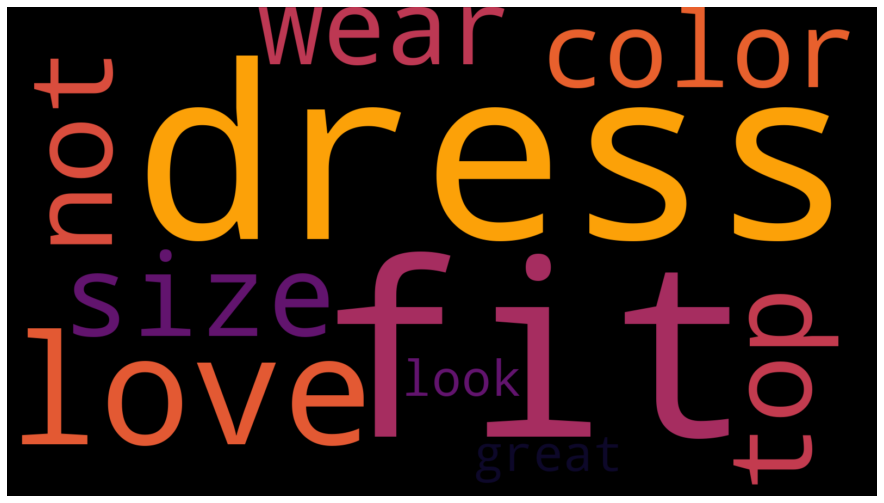

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,9))
plt.imshow(worldcloud, interpolation="bilinear",)                 #interpolation : renklendirme
plt.axis("off")                                                   # Cerceve olsun mu?
plt.show()

In [42]:
worldcloud.generate(negative_frequency_top_words)
print(worldcloud.words_)

{'not': 1.0, 'dress': 1.0, 'like': 1.0, 'top': 1.0, 'look': 1.0, 'fit': 1.0, 'size': 1.0, 'would': 1.0, 'fabric': 1.0, 'back': 1.0}


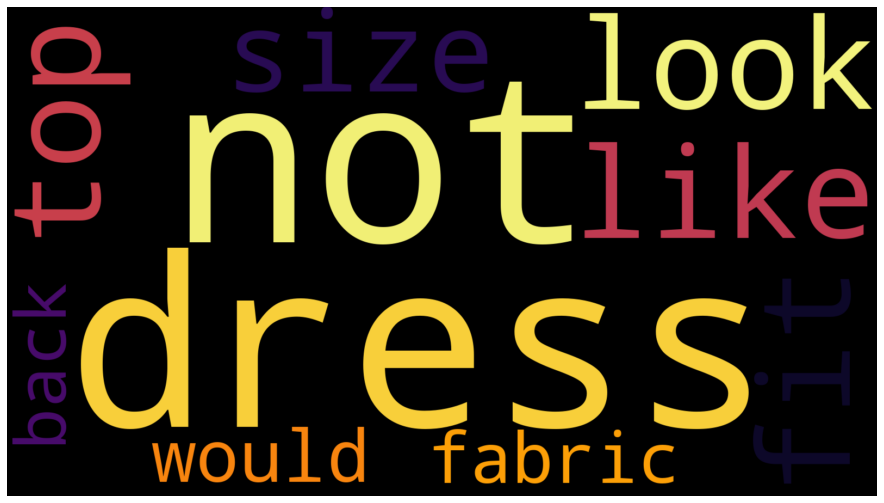

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,9))
plt.imshow(worldcloud, interpolation="bilinear",)                 #interpolation : renklendirme
plt.axis("off")                                                   # Cerceve olsun mu?
plt.show()

## Create Word Cloud with Image Background

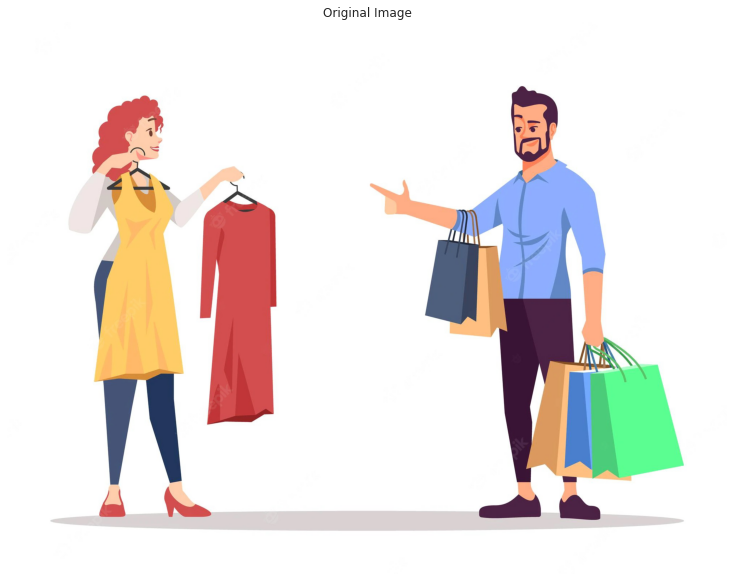

In [44]:
from PIL import Image

# load image create mask. Image background white.
mask = np.array(Image.open("/content/drive/MyDrive/03-M2/Proje/Sentiment_Analysis/choosing-dress.jpg"))

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(mask)
plt.axis("off")
plt.gca().grid(False)
plt.tight_layout(pad=0)

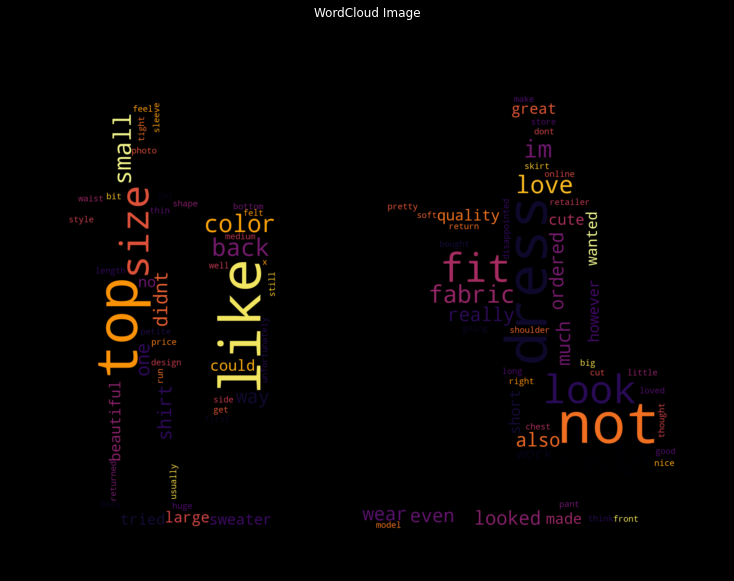

In [45]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

mask = np.array(Image.open("/content/drive/MyDrive/03-M2/Proje/Sentiment_Analysis/choosing-dress.jpg"))

# Generate wordcloud. relative_scaling=0 means the frequencies in the data are reflected less
wordcloud = WordCloud(background_color="black", colormap=plt.cm.inferno_r, max_words =2000, stopwords=stop_words, 
  width=1600, height=900, collocations=False, mask=mask, relative_scaling=0, contour_width=1).generate(negative_frequency_top_words)

plt.figure(figsize=(10, 10), facecolor='k')
plt.title("WordCloud Image", color='w')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.gca().grid(False)
plt.tight_layout(pad=0)

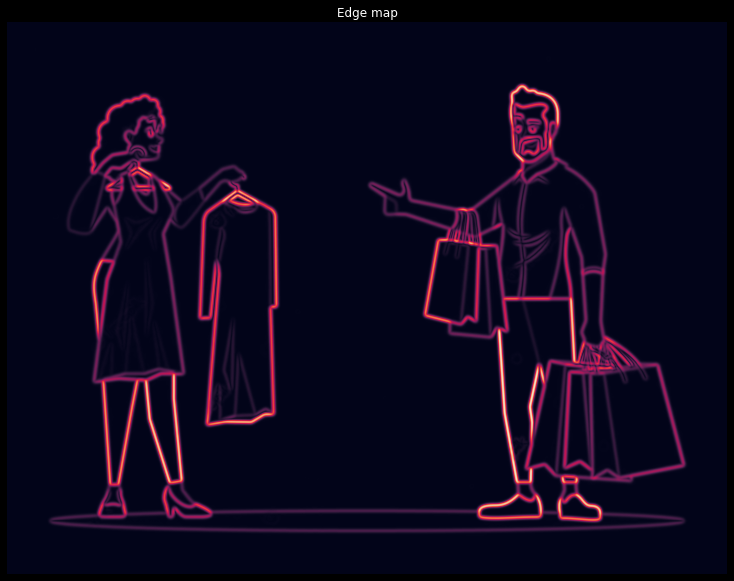

In [46]:
from scipy.ndimage import gaussian_gradient_magnitude
from PIL import Image

mask = np.array(Image.open("/content/drive/MyDrive/03-M2/Proje/Sentiment_Analysis/choosing-dress.jpg"))
edges = np.mean([gaussian_gradient_magnitude(mask[:, :, i] / 255., sigma=4) for i in range(3)], axis=0)
mask[edges > edges.max()/2] = 0

plt.figure(figsize=(10, 10), facecolor='k')
plt.title("Edge map", color='w')
plt.imshow(edges)
plt.axis("off")
plt.gca().grid(False)
plt.tight_layout(pad=0)
plt.show()

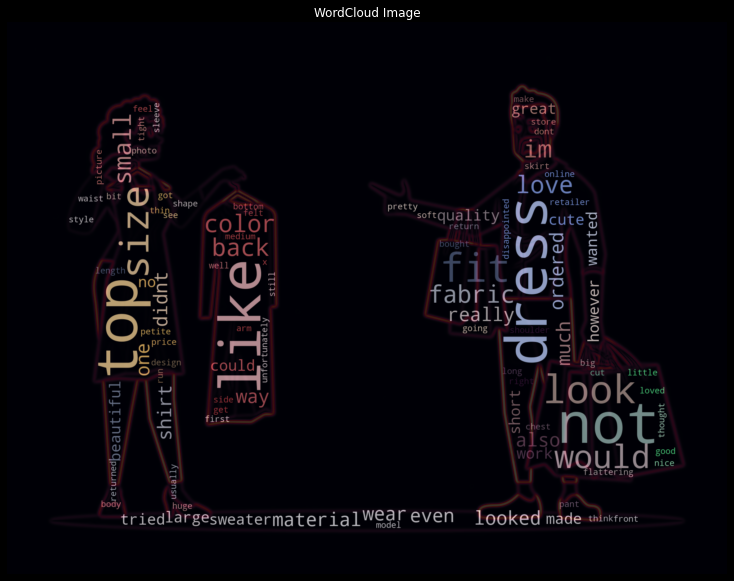

In [47]:
from wordcloud import WordCloud, ImageColorGenerator

# create coloring from image, white is "masked out".
mask[mask.sum(axis=2) == 0] = 255 
color = ImageColorGenerator(mask)
wordcloud.recolor(color_func=color)

plt.figure(figsize=(10, 10), facecolor='k')
plt.title("WordCloud Image", color='w')
plt.imshow(wordcloud, interpolation="bilinear")
plt.imshow(edges, alpha=0.25)
plt.axis("off")
plt.gca().grid(False)
plt.tight_layout(pad=0)
wordcloud.to_file("new.png")

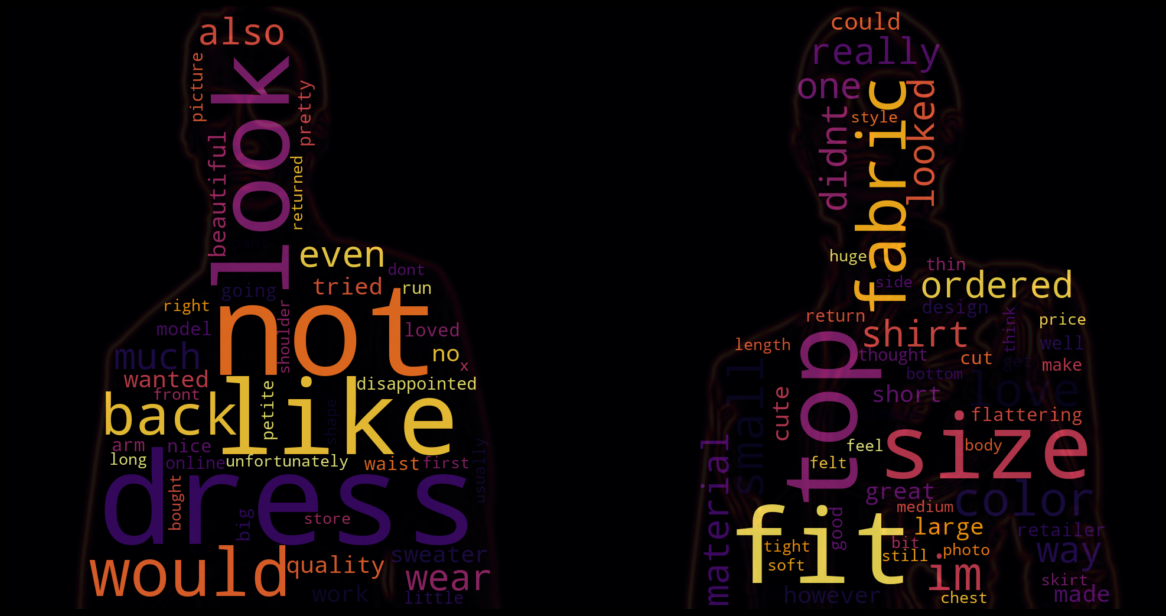

In [48]:
from wordcloud import WordCloud
from PIL import Image

mask = np.array(Image.open("/content/drive/MyDrive/03-M2/Proje/Sentiment_Analysis/matrix.png"))

edges = np.mean([gaussian_gradient_magnitude(mask[:, :, i] / 255., sigma=4) for i in range(3)], axis=0)
mask[edges > edges.max()/2] = 0

# Generate wordcloud. relative_scaling=0 means the frequencies in the data are reflected less
wordcloud = WordCloud(background_color="black", colormap=plt.cm.inferno_r, max_words =2000, stopwords=stop_words, 
  width=1600, height=900, collocations=False, mask=mask, relative_scaling=0, contour_width=1).generate(negative_frequency_top_words)
  
# Plot
plt.figure(figsize = (16,9), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.imshow(edges, alpha=0.1)
plt.axis("off")
plt.gca().grid(False)
plt.tight_layout(pad=0)
plt.show()

# 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

## Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df["text"]
y = df["not_recommended"].astype(int)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=random_state)

In [52]:
X_train.shape, X_test.shape

((19244,), (3397,))

In the next step we create a numerical feature vector for each document:

## Count Vectorization Transform

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,2), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [55]:
# min_df=3
X_train_count.shape, X_test_count.shape

((19244, 5056), (3397, 5056))

In [56]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able  abo  absolute  absolutely  abstract  \
0       0     0        0        0     0    0         0           0         0   
1       0     0        0        0     0    0         0           0         0   
2       0     0        0        0     0    0         0           0         0   
3       0     0        0        0     0    0         0           0         0   
4       0     0        0        0     1    0         0           0         0   
...    ..   ...      ...      ...   ...  ...       ...         ...       ...   
19239   0     0        0        0     0    0         0           0         0   
19240   0     0        0        0     0    0         0           0         0   
19241   0     0        0        0     0    0         0           0         0   
19242   0     0        0        0     0    0         0           1         0   
19243   0     0        0        0     0    0         0           0         0   

       absurd  abt  abundance  ac  accent  accented  accentuate  accentuated  \
0           0    0          0   0       0         0           0            0   
1           0    0          0   0       0         0           0            0   
2           0    0          0   0       0         0           0            0   
3           0    0          0   0       0         0           0            0   
4           0    0          0   0       0         0           0            0   
...       ...  ...        ...  ..     ...       ...         ...          ...   
19239       0    0          0   0       0         0           0            0   
19240       0    0          0   0       0         0           0            0   
19241       0    0          0   0       0         0           0            0   
19242       0    0          0   0       0         0           0            0   
19243       0    0          0   0       0         0           0            0   

       accentuates  accentuating  accept  acceptable  access  accessorize  \
0                0             0       0           0       0            0   
1                0             0       0           0       0            0   
2                0             0       0           0       0            0   
3                0             0       0           0       0            0   
4                0             0       0           0       0            0   
...            ...           ...     ...         ...     ...          ...   
19239            0             0       0           0       0            0   
19240            0             0       0           0       0            0   
19241            0             0       0           0       0            0   
19242            0             0       0           0       0            0   
19243            0             0       0           0       0            0   

       accessorized  accessorizing  accessory  accident  accidental  \
0                 0              0          0         0           0   
1                 0              0          0         0           0   
2                 0              0          0         0           0   
3                 0              0          0         0           0   
4                 0              0          0         0           0   
...             ...            ...        ...       ...         ...   
19239             0              0          0         0           0   
19240             0              0          0         0           0   
19241             0              0          0         0           0   
19242             0              0          0         0           0   
19243             0              0          0         0           0   

       accidentally  accommodate  accommodates  according  accordingly  \
0                 0            0             0          0            0   
1                 0            0             0          0            0   
2                 0            0             0          0            0   
3          

## TF-IDF Transform

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [58]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [59]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

Output hidden; open in https://colab.research.google.com to view.

## Eval Metric

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [61]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix, confusion_matrix

def eval_metric_classification(model, X_train, y_train, X_test, y_test, model_name='', ml_model=True, average=None, labels=None):
    """ average (None, 'micro', 'macro', 'samples', 'weighted', 'binary')"""
    # The style parameters control properties like the color of the background and whether a grid is enabled by default.
    sns.set_style("whitegrid", {'axes.grid' : False})
    if ml_model:
      y_pred_test = model.predict(X_test)
      y_pred_train = model.predict(X_train)
    else:
      y_pred_test = model.predict(X_test) >= 0.5
      y_pred_train = model.predict(X_train) >= 0.5
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    fig, ax = plt.subplots(2, 1, figsize=(7, 7))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax[0]);
    print("\n"*1, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=ax[1]);
    plt.tight_layout()
    
    return pd.DataFrame.from_dict({
        'accuracy_test' :accuracy_score(y_test, y_pred_test),
        'f1_test'       :np.array(f1_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'recall_test'   :np.array(recall_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'precision_test':np.array(precision_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],        
        'accuracy_train' :accuracy_score(y_train, y_pred_train),
        'f1_train'       :np.array(f1_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],        
        'recall_train'   :np.array(recall_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
        'precision_train':np.array(precision_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
    }, orient='index', columns=[model_name]).T

## Logistic Regression

### CountVectorizer

In [62]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=1, class_weight='balanced', random_state=random_state, max_iter=1000)
log.fit(X_train_count, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [63]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[2473  309]
 [ 127  488]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2782
           1       0.61      0.79      0.69       615

    accuracy                           0.87      3397
   macro avg       0.78      0.84      0.81      3397
weighted avg       0.89      0.87      0.88      3397

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     15758
           1       0.73      0.97      0.83      3486

    accuracy                           0.93     19244
   macro avg       0.86      0.94      0.89     19244
weighted avg       0.95      0.93      0.93     19244



In [64]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# for binary-class
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision_neg': make_scorer(precision_score, pos_label = 1),
#             'recall_neg': make_scorer(recall_score, pos_label = 1),
#             'f1_neg': make_scorer(f1_score, pos_label = 1)}

# for multi-class
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = LogisticRegression(C=1, class_weight='balanced', random_state=random_state, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_precision_neg  \
0     0.615       0.006          0.863           0.937               0.590   
1     0.631       0.006          0.872           0.937               0.619   
2     0.575       0.006          0.863           0.937               0.596   
3     0.677       0.006          0.876           0.935               0.621   
4     0.705       0.006          0.868           0.936               0.601   

   train_precision_neg  test_recall_neg  train_recall_neg  test_f1_neg  \
0                0.751            0.789             0.974        0.675   
1                0.752            0.760             0.971        0.683   
2                0.753            0.756             0.970        0.667   
3                0.744            0.815             0.975        0.705   
4                0.749            0.801             0.972        0.687   

   train_f1_neg  
0         0.848  
1         0.848  
2         0.848  
3         0.844  
4         0.846

test_accuracy         0.868
train_accuracy        0.936
test_precision_neg    0.606
train_precision_neg   0.750
test_recall_neg       0.784
train_recall_neg      0.972
test_f1_neg           0.683
train_f1_neg          0.847
dtype: float64

In [65]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(
    random_state=random_state,
    max_iter=1000,
)
param_grid = {
    "penalty" : ["l2"],
    "C" : np.linspace(0.1, 2, 4).round(3),
    "class_weight": ["balanced"],
    "solver": ["sag", "saga", "liblinear", "lbfgs", "newton-cg"]
}
recall_neg = make_scorer(recall_score, average=None, labels=[1])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = recall_neg,   
    n_jobs = -1,
    cv=5,
)

In [66]:
%%time
grid_model.fit(X_train_count, y_train)

CPU times: user 1.27 s, sys: 177 ms, total: 1.45 s
Wall time: 1min 36s


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=101),
             n_jobs=-1,
             param_grid={'C': array([0.1  , 0.733, 1.367, 2.   ]),
                         'class_weight': ['balanced'], 'penalty': ['l2'],
                         'solver': ['sag', 'saga', 'liblinear', 'lbfgs',
                                    'newton-cg']},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [67]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'sag'}

In [68]:
grid_model.best_score_

0.8356234044389996

In [69]:
print("GRID LOG MODEL BALANCED")
eval(grid_model, X_train_count, X_test_count)

GRID LOG MODEL BALANCED
[[2415  367]
 [  90  525]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2782
           1       0.59      0.85      0.70       615

    accuracy                           0.87      3397
   macro avg       0.78      0.86      0.81      3397
weighted avg       0.90      0.87      0.87      3397

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     15758
           1       0.65      0.92      0.76      3486

    accuracy                           0.90     19244
   macro avg       0.82      0.91      0.85     19244
weighted avg       0.92      0.90      0.90     19244



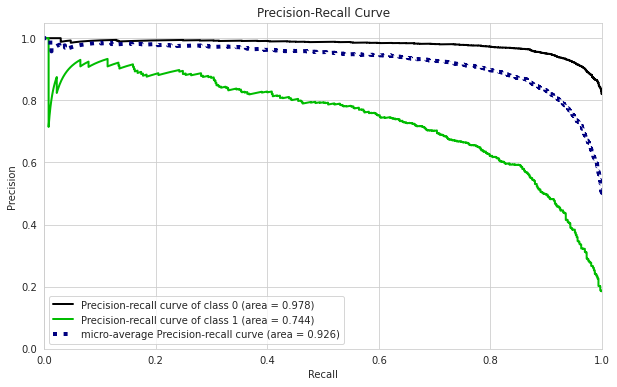

In [70]:
!pip install scikit-plot -q
import scikitplot as skplt

y_probas = grid_model.predict_proba(X_test_count)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

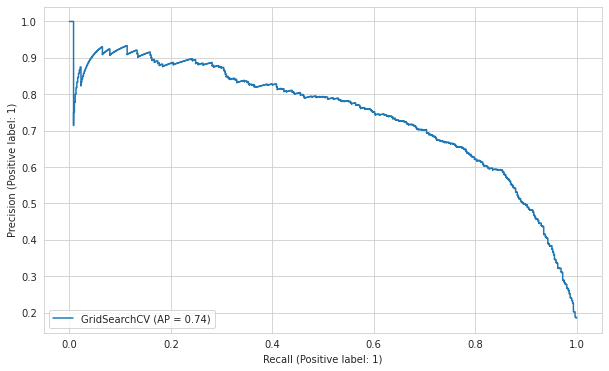

In [71]:
from sklearn.metrics import PrecisionRecallDisplay, plot_precision_recall_curve
# plot_precision_recall_curve(grid_model, X_test_count, y_test, pos_label=0); # deprecated
PrecisionRecallDisplay.from_estimator(grid_model, X_test_count, y_test, pos_label=1);

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/prcurve.py:257: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  YellowbrickWarning,


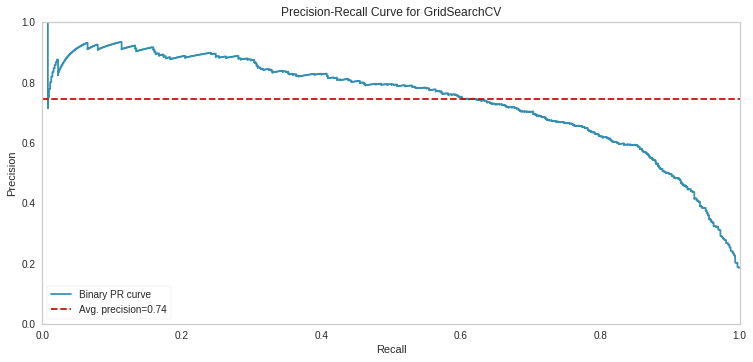

In [72]:
from yellowbrick.features import RadViz
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

visualizer = RadViz(size=(900, 400))
visualizer = PrecisionRecallCurve(
    estimator = grid_model,
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
visualizer.fit(X_train_count,y_train)
visualizer.score(X_test_count, y_test)
visualizer.show();

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2782
           1       0.59      0.85      0.70       615

    accuracy                           0.87      3397
   macro avg       0.78      0.86      0.81      3397
weighted avg       0.90      0.87      0.87      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     15758
           1       0.65      0.92      0.76      3486

    accuracy                           0.90     19244
   macro avg       0.82      0.91      0.85     19244
weighted avg       0.92      0.90      0.90     19244



accuracy_test  f1_test  recall_test  \
Logistic Regression Count          0.865    0.697        0.854   

                           precision_test  accuracy_train  f1_train  \
Logistic Regression Count           0.589           0.896     0.763   

                           recall_train  precision_train  
Logistic Regression Count         0.924            0.650

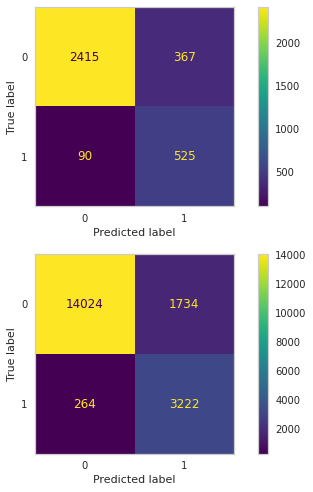

In [73]:
out_score_log = eval_metric_classification(
    grid_model, X_train_count, y_train, X_test_count, y_test, 
    'Logistic Regression Count', average=None, labels=[1]
)
out_score_log

### TF-IDF

In [74]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=1, class_weight='balanced', random_state=random_state, max_iter=1000)
log.fit(X_train_tf_idf, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [75]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[2397  385]
 [  88  527]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2782
           1       0.58      0.86      0.69       615

    accuracy                           0.86      3397
   macro avg       0.77      0.86      0.80      3397
weighted avg       0.89      0.86      0.87      3397

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     15758
           1       0.64      0.93      0.76      3486

    accuracy                           0.89     19244
   macro avg       0.81      0.91      0.85     19244
weighted avg       0.92      0.89      0.90     19244



In [76]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = LogisticRegression(C=1, class_weight='balanced', random_state=random_state, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=5, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_precision_neg  \
0     0.132       0.005          0.863           0.899               0.582   
1     0.181       0.006          0.873           0.895               0.610   
2     0.139       0.005          0.858           0.898               0.576   
3     0.142       0.013          0.869           0.895               0.595   
4     0.351       0.009          0.871           0.893               0.601   

   train_precision_neg  test_recall_neg  train_recall_neg  test_f1_neg  \
0                0.654            0.867             0.937        0.697   
1                0.646            0.829             0.930        0.703   
2                0.652            0.831             0.937        0.680   
3                0.644            0.868             0.933        0.706   
4                0.641            0.862             0.933        0.708   

   train_f1_neg  
0         0.770  
1         0.763  
2         0.769  
3         0.762  
4         0.760

test_accuracy         0.867
train_accuracy        0.896
test_precision_neg    0.593
train_precision_neg   0.648
test_recall_neg       0.851
train_recall_neg      0.934
test_f1_neg           0.699
train_f1_neg          0.765
dtype: float64

In [77]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(
    random_state=random_state,
    max_iter=1000,
)
param_grid = {
    "penalty" : ["l2"],
    "C" : np.linspace(0.1, 2, 4).round(3),
    "class_weight": ["balanced"],
    "solver": ["liblinear", "lbfgs"]
}
recall_neg = make_scorer(recall_score, average=None, labels=[1])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = recall_neg,   
    n_jobs = -1,
    cv=5,
)

In [78]:
%%time
grid_model.fit(X_train_tf_idf,y_train)

CPU times: user 231 ms, sys: 19.4 ms, total: 250 ms
Wall time: 4.04 s


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=101),
             n_jobs=-1,
             param_grid={'C': array([0.1  , 0.733, 1.367, 2.   ]),
                         'class_weight': ['balanced'], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [79]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

In [80]:
grid_model.best_score_

0.859721771160068

In [81]:
print("GRID LOG MODEL BALANCED")
eval(grid_model, X_train_tf_idf, X_test_tf_idf)

GRID LOG MODEL BALANCED
[[2337  445]
 [  84  531]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2782
           1       0.54      0.86      0.67       615

    accuracy                           0.84      3397
   macro avg       0.75      0.85      0.78      3397
weighted avg       0.89      0.84      0.86      3397

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     15758
           1       0.57      0.89      0.70      3486

    accuracy                           0.86     19244
   macro avg       0.77      0.87      0.80     19244
weighted avg       0.90      0.86      0.87     19244



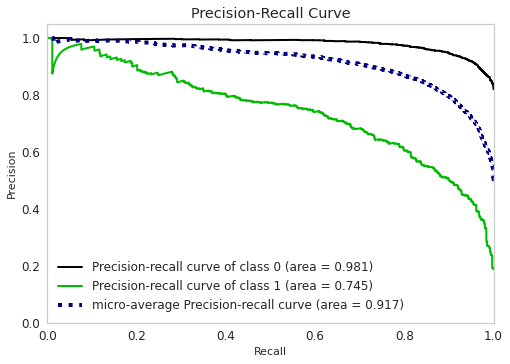

In [82]:
y_probas = grid_model.predict_proba(X_test_tf_idf)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2782
           1       0.54      0.86      0.67       615

    accuracy                           0.84      3397
   macro avg       0.75      0.85      0.78      3397
weighted avg       0.89      0.84      0.86      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     15758
           1       0.57      0.89      0.70      3486

    accuracy                           0.86     19244
   macro avg       0.77      0.87      0.80     19244
weighted avg       0.90      0.86      0.87     19244



accuracy_test  f1_test  recall_test  precision_test  \
Logistic Regression TF          0.844    0.668        0.863           0.544   

                        accuracy_train  f1_train  recall_train  \
Logistic Regression TF           0.859     0.696         0.893   

                        precision_train  
Logistic Regression TF            0.570

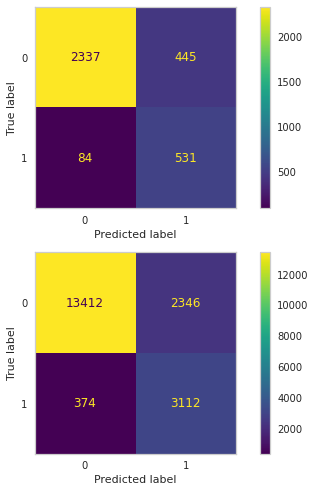

In [83]:
out_score_log_tf = eval_metric_classification(
    grid_model, X_train_tf_idf, y_train, X_test_tf_idf, y_test, 
    'Logistic Regression TF', average=None, labels=[1]
)
out_score_log_tf

## Naive Bayes 

### Countvectorizer

In [84]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.61061048, 0.61061048, 2.76018359, ..., 0.61061048, 0.61061048,
       0.61061048])

In [85]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.610610483563904, 1: 2.7601835915088926}

In [86]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

nb = MultinomialNB(alpha=1)
nb.fit(X_train_count,y_train, sample_weight=classes_weights)

MultinomialNB(alpha=1)

In [87]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[2377  405]
 [  76  539]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2782
           1       0.57      0.88      0.69       615

    accuracy                           0.86      3397
   macro avg       0.77      0.87      0.80      3397
weighted avg       0.90      0.86      0.87      3397

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     15758
           1       0.61      0.91      0.73      3486

    accuracy                           0.88     19244
   macro avg       0.79      0.89      0.82     19244
weighted avg       0.91      0.88      0.89     19244



In [88]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_precision_neg  \
0     0.008       0.006          0.859           0.882               0.573   
1     0.007       0.006          0.863           0.879               0.585   
2     0.006       0.006          0.855           0.882               0.568   
3     0.007       0.006          0.854           0.880               0.563   
4     0.007       0.006          0.860           0.879               0.575   

   train_precision_neg  test_recall_neg  train_recall_neg  test_f1_neg  \
0                0.618            0.869             0.917        0.691   
1                0.611            0.836             0.916        0.689   
2                0.616            0.829             0.921        0.674   
3                0.613            0.865             0.916        0.682   
4                0.611            0.869             0.922        0.693   

   train_f1_neg  
0         0.738  
1         0.733  
2         0.738  
3         0.734  
4         0.735

test_accuracy         0.858
train_accuracy        0.880
test_precision_neg    0.573
train_precision_neg   0.614
test_recall_neg       0.854
train_recall_neg      0.918
test_f1_neg           0.686
train_f1_neg          0.736
dtype: float64

In [89]:
from sklearn.model_selection import GridSearchCV

model = MultinomialNB(alpha=1)
param_grid = {
    "alpha" : np.linspace(90, 100, 11).round(3),
}
recall_neg = make_scorer(recall_score, average=None, labels=[1])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = recall_neg,   
    n_jobs = -1,
    cv=5,
)

In [90]:
%%time
grid_model.fit(X_train_count, y_train, sample_weight=classes_weights)

CPU times: user 159 ms, sys: 23.1 ms, total: 182 ms
Wall time: 712 ms


GridSearchCV(cv=5, estimator=MultinomialNB(alpha=1), n_jobs=-1,
             param_grid={'alpha': array([ 90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.])},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [91]:
grid_model.best_params_

{'alpha': 97.0}

In [92]:
grid_model.best_score_

0.88439197049985

In [93]:
print("GRID NB MODEL BALANCED")
eval(grid_model,  X_train_count, X_test_count)

GRID NB MODEL BALANCED
[[2274  508]
 [  75  540]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2782
           1       0.52      0.88      0.65       615

    accuracy                           0.83      3397
   macro avg       0.74      0.85      0.77      3397
weighted avg       0.89      0.83      0.84      3397

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     15758
           1       0.53      0.90      0.67      3486

    accuracy                           0.84     19244
   macro avg       0.75      0.86      0.78     19244
weighted avg       0.89      0.84      0.85     19244



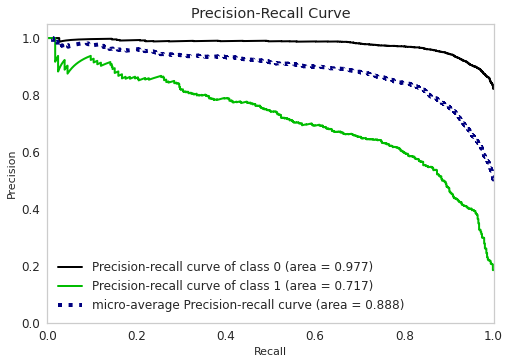

In [94]:
!pip install scikit-plot -q
import scikitplot as skplt

y_probas = grid_model.predict_proba(X_test_count)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2782
           1       0.52      0.88      0.65       615

    accuracy                           0.83      3397
   macro avg       0.74      0.85      0.77      3397
weighted avg       0.89      0.83      0.84      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     15758
           1       0.53      0.90      0.67      3486

    accuracy                           0.84     19244
   macro avg       0.75      0.86      0.78     19244
weighted avg       0.89      0.84      0.85     19244



accuracy_test  f1_test  recall_test  precision_test  \
Naive Bayes Count          0.828    0.649        0.878           0.515   

                   accuracy_train  f1_train  recall_train  precision_train  
Naive Bayes Count           0.838     0.668         0.898            0.532

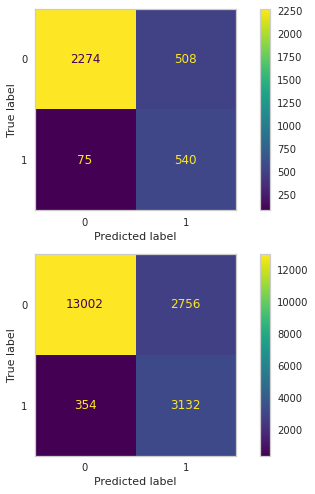

In [95]:
out_score_nb = eval_metric_classification(
    grid_model, X_train_count, y_train, X_test_count, y_test, 
    'Naive Bayes Count', average=None, labels=[1]
)
out_score_nb

### TF-IDF

In [96]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

nb = BernoulliNB(alpha=1)
nb.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

BernoulliNB(alpha=1)

In [97]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[2384  398]
 [  85  530]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2782
           1       0.57      0.86      0.69       615

    accuracy                           0.86      3397
   macro avg       0.77      0.86      0.80      3397
weighted avg       0.89      0.86      0.87      3397

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     15758
           1       0.61      0.92      0.73      3486

    accuracy                           0.88     19244
   macro avg       0.79      0.89      0.83     19244
weighted avg       0.91      0.88      0.89     19244



In [98]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_precision_neg  \
0     0.011       0.007          0.857           0.882               0.568   
1     0.008       0.007          0.865           0.880               0.588   
2     0.008       0.007          0.852           0.880               0.563   
3     0.011       0.007          0.857           0.881               0.570   
4     0.009       0.007          0.860           0.880               0.576   

   train_precision_neg  test_recall_neg  train_recall_neg  test_f1_neg  \
0                0.616            0.877             0.919        0.689   
1                0.613            0.844             0.923        0.693   
2                0.613            0.832             0.920        0.671   
3                0.614            0.865             0.918        0.688   
4                0.612            0.865             0.925        0.692   

   train_f1_neg  
0         0.738  
1         0.736  
2         0.736  
3         0.736  
4         0.737

test_accuracy         0.858
train_accuracy        0.881
test_precision_neg    0.573
train_precision_neg   0.614
test_recall_neg       0.857
train_recall_neg      0.921
test_f1_neg           0.687
train_f1_neg          0.737
dtype: float64

In [99]:
from sklearn.model_selection import GridSearchCV

model = BernoulliNB(alpha=1)
param_grid = {
    "alpha" : np.linspace(5, 10, 11).round(3),
}
recall_neg = make_scorer(recall_score, average=None, labels=[1])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = recall_neg,   
    n_jobs = -1,
    cv=5,
)

In [100]:
%%time
grid_model.fit(X_train_tf_idf,y_train, sample_weight=classes_weights)

CPU times: user 179 ms, sys: 14.3 ms, total: 193 ms
Wall time: 867 ms


GridSearchCV(cv=5, estimator=BernoulliNB(alpha=1), n_jobs=-1,
             param_grid={'alpha': array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [101]:
grid_model.best_params_

{'alpha': 6.5}

In [102]:
grid_model.best_score_

0.8763616481605571

In [103]:
print("GRID NB MODEL BALANCED")
eval(grid_model,  X_train_tf_idf, X_test_tf_idf)

GRID NB MODEL BALANCED
[[2360  422]
 [  79  536]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      2782
           1       0.56      0.87      0.68       615

    accuracy                           0.85      3397
   macro avg       0.76      0.86      0.79      3397
weighted avg       0.89      0.85      0.86      3397

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.86      0.91     15758
           1       0.58      0.91      0.71      3486

    accuracy                           0.87     19244
   macro avg       0.78      0.88      0.81     19244
weighted avg       0.91      0.87      0.88     19244



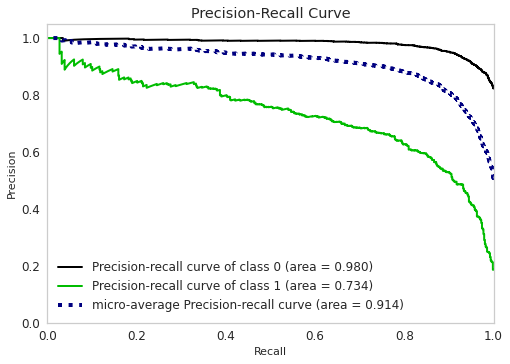

In [104]:
y_probas = grid_model.predict_proba(X_test_tf_idf)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      2782
           1       0.56      0.87      0.68       615

    accuracy                           0.85      3397
   macro avg       0.76      0.86      0.79      3397
weighted avg       0.89      0.85      0.86      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.86      0.91     15758
           1       0.58      0.91      0.71      3486

    accuracy                           0.87     19244
   macro avg       0.78      0.88      0.81     19244
weighted avg       0.91      0.87      0.88     19244



accuracy_test  f1_test  recall_test  precision_test  \
Naive Bayes TF          0.853    0.682        0.872           0.559   

                accuracy_train  f1_train  recall_train  precision_train  
Naive Bayes TF           0.867     0.711         0.907            0.585

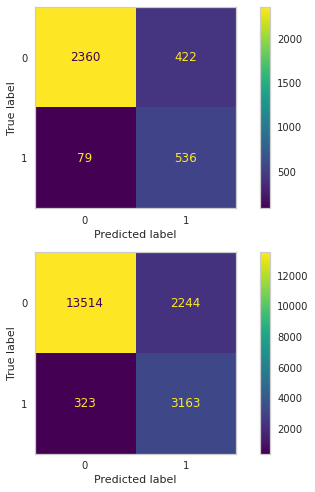

In [105]:
out_score_nb_tf = eval_metric_classification(
    grid_model, X_train_tf_idf, y_train, X_test_tf_idf, y_test, 
    'Naive Bayes TF', average=None, labels=[1]
)
out_score_nb_tf

## Support Vector Machine (SVM)

### Countvectorizer

In [106]:
from sklearn.svm import LinearSVC, SVC
svc = LinearSVC(C=1, class_weight='balanced', random_state=random_state, max_iter=10000)
svc.fit(X_train_count, y_train)

LinearSVC(C=1, class_weight='balanced', max_iter=10000, random_state=101)

In [107]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[2477  305]
 [ 174  441]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2782
           1       0.59      0.72      0.65       615

    accuracy                           0.86      3397
   macro avg       0.76      0.80      0.78      3397
weighted avg       0.87      0.86      0.86      3397

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     15758
           1       0.82      0.98      0.89      3486

    accuracy                           0.96     19244
   macro avg       0.91      0.97      0.93     19244
weighted avg       0.96      0.96      0.96     19244



In [108]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = LinearSVC(C=1, class_weight='balanced', random_state=random_state, max_iter=10000)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_precision_neg  \
0     1.885       0.007          0.838           0.969               0.541   
1     1.775       0.007          0.854           0.968               0.583   
2     1.908       0.006          0.853           0.969               0.582   
3     1.797       0.006          0.863           0.968               0.603   
4     1.757       0.006          0.851           0.968               0.570   

   train_precision_neg  test_recall_neg  train_recall_neg  test_f1_neg  \
0                0.861            0.679             0.989        0.602   
1                0.857            0.686             0.991        0.630   
2                0.858            0.677             0.991        0.626   
3                0.857            0.708             0.988        0.651   
4                0.854            0.722             0.990        0.637   

   train_f1_neg  
0         0.921  
1         0.919  
2         0.920  
3         0.918  
4         0.917

test_accuracy         0.852
train_accuracy        0.968
test_precision_neg    0.576
train_precision_neg   0.858
test_recall_neg       0.694
train_recall_neg      0.990
test_f1_neg           0.629
train_f1_neg          0.919
dtype: float64

In [109]:
from sklearn.model_selection import GridSearchCV

model = LinearSVC(
    max_iter=10000,
    random_state=random_state
)
param_grid = {
    "C" : np.linspace(0.01, 2, 3).round(3),
    "class_weight": ["balanced"],
}
recall_neg = make_scorer(recall_score, average=None, labels=[1])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = recall_neg,   
    n_jobs = -1,
    cv=5,
)

In [110]:
%%time
grid_model.fit(X_train_count, y_train)

CPU times: user 365 ms, sys: 20.5 ms, total: 385 ms
Wall time: 33.1 s


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=10000, random_state=101),
             n_jobs=-1,
             param_grid={'C': array([0.01 , 1.005, 2.   ]),
                         'class_weight': ['balanced']},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [111]:
grid_model.best_params_

{'C': 0.01, 'class_weight': 'balanced'}

In [112]:
grid_model.best_score_

0.8390650886114457

In [113]:
print("SVC MODEL")
eval(grid_model, X_train_count, X_test_count)

SVC MODEL
[[2415  367]
 [  95  520]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2782
           1       0.59      0.85      0.69       615

    accuracy                           0.86      3397
   macro avg       0.77      0.86      0.80      3397
weighted avg       0.89      0.86      0.87      3397

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     15758
           1       0.65      0.93      0.77      3486

    accuracy                           0.90     19244
   macro avg       0.82      0.91      0.85     19244
weighted avg       0.92      0.90      0.90     19244



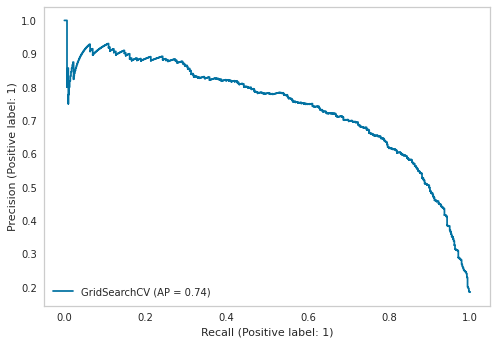

In [114]:
from sklearn.metrics import PrecisionRecallDisplay, plot_precision_recall_curve
PrecisionRecallDisplay.from_estimator(grid_model, X_test_count, y_test, pos_label=1);

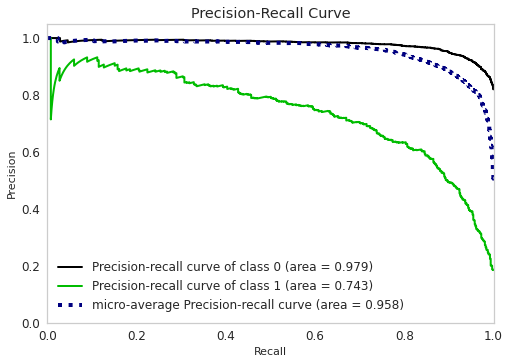

In [115]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_svc = CalibratedClassifierCV(
    # base_estimator=LinearSVC(C=0.05, class_weight='balanced', random_state=random_state),
    base_estimator=grid_model, 
    method='sigmoid',
    cv=4, 
)
calibrated_svc.fit(X_train_count, y_train)

y_probas = calibrated_svc.predict_proba(X_test_count)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2782
           1       0.59      0.85      0.69       615

    accuracy                           0.86      3397
   macro avg       0.77      0.86      0.80      3397
weighted avg       0.89      0.86      0.87      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     15758
           1       0.65      0.93      0.77      3486

    accuracy                           0.90     19244
   macro avg       0.82      0.91      0.85     19244
weighted avg       0.92      0.90      0.90     19244



accuracy_test  f1_test  recall_test  precision_test  \
SVM Count          0.864    0.692        0.846           0.586   

           accuracy_train  f1_train  recall_train  precision_train  
SVM Count           0.897     0.766         0.930            0.651

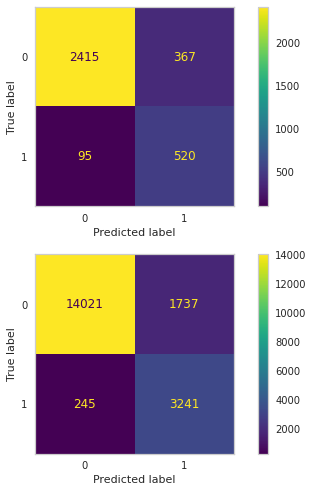

In [116]:
out_score_svc = eval_metric_classification(
    grid_model, X_train_count, y_train, X_test_count, y_test, 
    'SVM Count', average=None, labels=[1]
)
out_score_svc

### TD-IDF

In [117]:
from sklearn.svm import LinearSVC, SVC
svc = LinearSVC(C=1, class_weight='balanced', random_state=random_state, max_iter=10000)
svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=1, class_weight='balanced', max_iter=10000, random_state=101)

In [118]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[2450  332]
 [ 119  496]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      2782
           1       0.60      0.81      0.69       615

    accuracy                           0.87      3397
   macro avg       0.78      0.84      0.80      3397
weighted avg       0.89      0.87      0.87      3397

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     15758
           1       0.72      0.97      0.83      3486

    accuracy                           0.93     19244
   macro avg       0.86      0.95      0.89     19244
weighted avg       0.94      0.93      0.93     19244



In [119]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = LinearSVC(C=1, class_weight='balanced', random_state=random_state, max_iter=10000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=5, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_precision_neg  \
0     0.152       0.004          0.862           0.932               0.588   
1     0.150       0.004          0.850           0.931               0.560   
2     0.150       0.004          0.864           0.930               0.596   
3     0.146       0.004          0.869           0.932               0.615   
4     0.145       0.004          0.863           0.932               0.592   
5     0.158       0.004          0.859           0.930               0.587   
6     0.147       0.004          0.873           0.930               0.609   
7     0.158       0.005          0.886           0.930               0.641   
8     0.151       0.004          0.861           0.931               0.589   
9     0.152       0.004          0.880           0.928               0.628   

   train_precision_neg  test_recall_neg  train_recall_neg  test_f1_neg  \
0                0.735            0.808             0.976        0.680   
1                0.733            0.799             0.974        0.659   
2                0.731            0.774             0.974        0.673   
3                0.735            0.736             0.976        0.670   
4                0.736            0.776             0.975        0.672   
5                0.730            0.739             0.975        0.654   
6                0.730            0.825             0.975        0.701   
7                0.728            0.836             0.976        0.726   
8                0.732            0.777             0.974        0.670   
9                0.724            0.831             0.975        0.715   

   train_f1_neg  
0         0.839  
1         0.836  
2         0.835  
3         0.838  
4         0.839  
5         0.835  
6         0.835  
7         0.834  
8         0.836  
9         0.831

test_accuracy         0.867
train_accuracy        0.931
test_precision_neg    0.600
train_precision_neg   0.731
test_recall_neg       0.790
train_recall_neg      0.975
test_f1_neg           0.682
train_f1_neg          0.836
dtype: float64

In [120]:
from sklearn.model_selection import GridSearchCV

model = LinearSVC(
    random_state=random_state,
    max_iter=10000,
)
param_grid = {
    "C" : np.linspace(0.01, 2, 3).round(3),
    "class_weight": ["balanced"],
}
recall_neg = make_scorer(recall_score, average=None, labels=[1])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = recall_neg,   
    n_jobs = -1,
    cv=5,
)

In [121]:
%%time
grid_model.fit(X_train_tf_idf, y_train)

CPU times: user 115 ms, sys: 7.98 ms, total: 123 ms
Wall time: 1.84 s


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=10000, random_state=101),
             n_jobs=-1,
             param_grid={'C': array([0.01 , 1.005, 2.   ]),
                         'class_weight': ['balanced']},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [122]:
grid_model.best_params_

{'C': 0.01, 'class_weight': 'balanced'}

In [123]:
grid_model.best_score_

0.8645981755620691

In [124]:
print("SVC MODEL")
eval(grid_model, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[2331  451]
 [  82  533]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2782
           1       0.54      0.87      0.67       615

    accuracy                           0.84      3397
   macro avg       0.75      0.85      0.78      3397
weighted avg       0.89      0.84      0.86      3397

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     15758
           1       0.57      0.90      0.69      3486

    accuracy                           0.86     19244
   macro avg       0.77      0.87      0.80     19244
weighted avg       0.90      0.86      0.87     19244



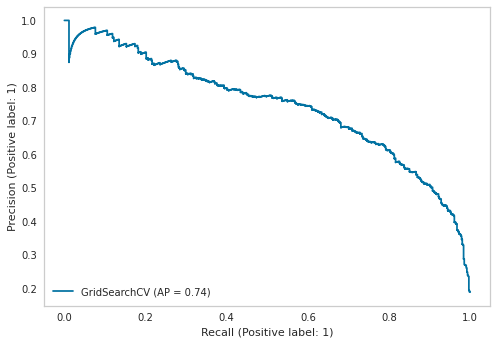

In [125]:
from sklearn.metrics import PrecisionRecallDisplay, plot_precision_recall_curve
PrecisionRecallDisplay.from_estimator(grid_model, X_test_tf_idf, y_test, pos_label=1);

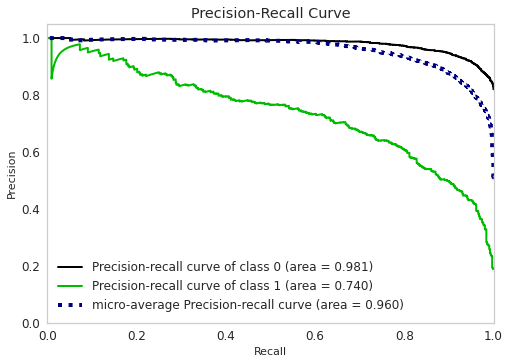

In [126]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_svc = CalibratedClassifierCV(
    # base_estimator=LinearSVC(C=0.05, class_weight='balanced', random_state=random_state),
    base_estimator=grid_model, 
    method='sigmoid',
    cv=4, 
)
calibrated_svc.fit(X_train_tf_idf, y_train)

y_probas = calibrated_svc.predict_proba(X_test_tf_idf)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2782
           1       0.54      0.87      0.67       615

    accuracy                           0.84      3397
   macro avg       0.75      0.85      0.78      3397
weighted avg       0.89      0.84      0.86      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     15758
           1       0.57      0.90      0.69      3486

    accuracy                           0.86     19244
   macro avg       0.77      0.87      0.80     19244
weighted avg       0.90      0.86      0.87     19244



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
SVM TF          0.843    0.667        0.867           0.542           0.857   

        f1_train  recall_train  precision_train  
SVM TF     0.694         0.898            0.566

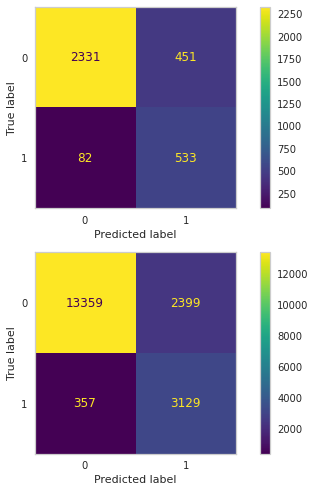

In [127]:
out_score_svc_tf = eval_metric_classification(
    grid_model, X_train_tf_idf, y_train, X_test_tf_idf, y_test, 
    'SVM TF', average=None, labels=[1]
)
out_score_svc_tf

## Random Forest

### Countvectorizer

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced", random_state=random_state)
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [129]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[2748   34]
 [ 441  174]]
Test_Set
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2782
           1       0.84      0.28      0.42       615

    accuracy                           0.86      3397
   macro avg       0.85      0.64      0.67      3397
weighted avg       0.86      0.86      0.83      3397

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15758
           1       1.00      1.00      1.00      3486

    accuracy                           1.00     19244
   macro avg       1.00      1.00      1.00     19244
weighted avg       1.00      1.00      1.00     19244



In [130]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = RandomForestClassifier(class_weight="balanced", random_state=random_state)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_precision_neg  \
0    10.375       0.150          0.855           1.000               0.791   
1    11.386       0.134          0.861           1.000               0.865   
2    10.612       0.133          0.857           1.000               0.844   
3    12.149       0.134          0.858           1.000               0.842   
4    10.442       0.135          0.862           1.000               0.855   

   train_precision_neg  test_recall_neg  train_recall_neg  test_f1_neg  \
0                1.000            0.271             1.000        0.404   
1                1.000            0.275             1.000        0.418   
2                1.000            0.257             1.000        0.394   
3                1.000            0.268             1.000        0.407   
4                1.000            0.288             1.000        0.431   

   train_f1_neg  
0         1.000  
1         1.000  
2         1.000  
3         1.000  
4         1.000

test_accuracy         0.859
train_accuracy        1.000
test_precision_neg    0.840
train_precision_neg   1.000
test_recall_neg       0.272
train_recall_neg      1.000
test_f1_neg           0.411
train_f1_neg          1.000
dtype: float64

In [131]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(
    random_state=random_state
)
param_grid = {
    'max_depth': np.arange(2, 5, 1), 
    'n_estimators': np.linspace(50, 100, 11, dtype=int),
    'class_weight': ['balanced'], 
}
recall_neg = make_scorer(recall_score, average=None, labels=[1])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = recall_neg,   
    n_jobs = -1,
    cv=5,
)

In [132]:
%%time
grid_model.fit(X_train_count, y_train)

CPU times: user 1.39 s, sys: 97.5 ms, total: 1.49 s
Wall time: 36.3 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': array([2, 3, 4]),
                         'n_estimators': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100])},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [133]:
grid_model.best_params_

{'class_weight': 'balanced', 'max_depth': 2, 'n_estimators': 75}

In [134]:
grid_model.best_score_

0.8026384052817438

In [135]:
print("RF MODEL")
eval(grid_model, X_train_count, X_test_count)

RF MODEL
[[2042  740]
 [ 107  508]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.73      0.83      2782
           1       0.41      0.83      0.55       615

    accuracy                           0.75      3397
   macro avg       0.68      0.78      0.69      3397
weighted avg       0.85      0.75      0.78      3397

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.74      0.83     15758
           1       0.42      0.83      0.55      3486

    accuracy                           0.76     19244
   macro avg       0.68      0.79      0.69     19244
weighted avg       0.85      0.76      0.78     19244



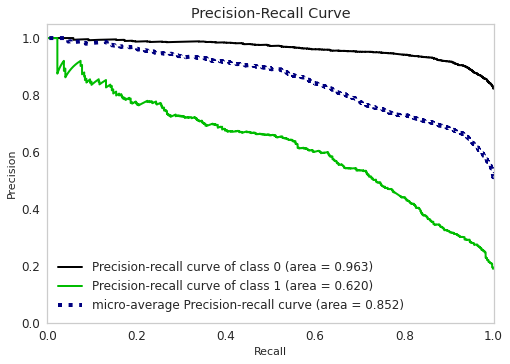

In [136]:
y_probas = grid_model.predict_proba(X_test_count)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.73      0.83      2782
           1       0.41      0.83      0.55       615

    accuracy                           0.75      3397
   macro avg       0.68      0.78      0.69      3397
weighted avg       0.85      0.75      0.78      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.95      0.74      0.83     15758
           1       0.42      0.83      0.55      3486

    accuracy                           0.76     19244
   macro avg       0.68      0.79      0.69     19244
weighted avg       0.85      0.76      0.78     19244



accuracy_test  f1_test  recall_test  precision_test  \
Random Forest Count          0.751    0.545        0.826           0.407   

                     accuracy_train  f1_train  recall_train  precision_train  
Random Forest Count           0.759     0.555         0.828            0.417

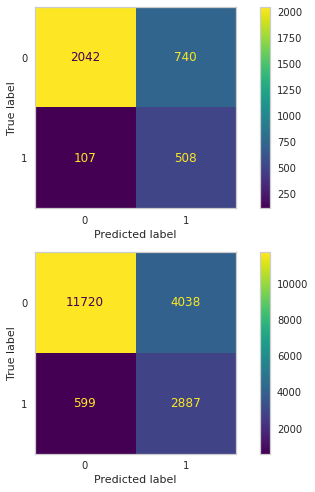

In [137]:
out_score_rf = eval_metric_classification(
    grid_model, X_train_count, y_train, X_test_count, y_test, 
    'Random Forest Count', average=None, labels=[1]
)
out_score_rf

### TF-IDF

In [138]:
rf = RandomForestClassifier(class_weight="balanced", random_state=random_state, n_jobs=-1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=101)

In [139]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2744   38]
 [ 439  176]]
Test_Set
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2782
           1       0.82      0.29      0.42       615

    accuracy                           0.86      3397
   macro avg       0.84      0.64      0.67      3397
weighted avg       0.85      0.86      0.83      3397

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15758
           1       1.00      1.00      1.00      3486

    accuracy                           1.00     19244
   macro avg       1.00      1.00      1.00     19244
weighted avg       1.00      1.00      1.00     19244



In [140]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = RandomForestClassifier(class_weight="balanced", random_state=random_state, n_jobs=-1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=5, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_precision_neg  \
0     7.522       0.108          0.861           1.000               0.793   
1     7.495       0.108          0.860           1.000               0.854   
2     7.634       0.108          0.853           1.000               0.810   
3     7.593       0.208          0.857           1.000               0.830   
4     7.689       0.108          0.864           1.000               0.847   

   train_precision_neg  test_recall_neg  train_recall_neg  test_f1_neg  \
0                1.000            0.313             1.000        0.449   
1                1.000            0.277             1.000        0.418   
2                1.000            0.245             1.000        0.377   
3                1.000            0.265             1.000        0.402   
4                1.000            0.303             1.000        0.446   

   train_f1_neg  
0         1.000  
1         1.000  
2         1.000  
3         1.000  
4         1.000

test_accuracy         0.859
train_accuracy        1.000
test_precision_neg    0.827
train_precision_neg   1.000
test_recall_neg       0.281
train_recall_neg      1.000
test_f1_neg           0.418
train_f1_neg          1.000
dtype: float64

In [141]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(
    random_state=random_state
)
param_grid = {
    'max_depth': np.arange(1, 5, 1), 
    'n_estimators': np.linspace(50, 150, 11, dtype=int),
    'class_weight': ['balanced'], 
}
recall_neg = make_scorer(recall_score, average=None, labels=[1])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = recall_neg,   
    n_jobs = -1,
    cv=5,
)

In [142]:
%%time
grid_model.fit(X_train_tf_idf, y_train)

CPU times: user 2.23 s, sys: 138 ms, total: 2.37 s
Wall time: 1min 11s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': array([1, 2, 3, 4]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [143]:
grid_model.best_params_

{'class_weight': 'balanced', 'max_depth': 3, 'n_estimators': 130}

In [144]:
grid_model.best_score_

0.8072295100163205

In [145]:
print("RF MODEL")
eval(grid_model, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2193  589]
 [ 105  510]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2782
           1       0.46      0.83      0.60       615

    accuracy                           0.80      3397
   macro avg       0.71      0.81      0.73      3397
weighted avg       0.87      0.80      0.81      3397

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     15758
           1       0.48      0.85      0.61      3486

    accuracy                           0.81     19244
   macro avg       0.72      0.82      0.74     19244
weighted avg       0.87      0.81      0.82     19244



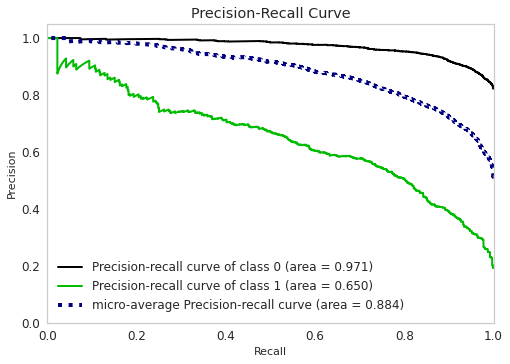

In [146]:
y_probas = grid_model.predict_proba(X_test_tf_idf)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2782
           1       0.46      0.83      0.60       615

    accuracy                           0.80      3397
   macro avg       0.71      0.81      0.73      3397
weighted avg       0.87      0.80      0.81      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     15758
           1       0.48      0.85      0.61      3486

    accuracy                           0.81     19244
   macro avg       0.72      0.82      0.74     19244
weighted avg       0.87      0.81      0.82     19244



accuracy_test  f1_test  recall_test  precision_test  \
Random Forest TF          0.796    0.595        0.829           0.464   

                  accuracy_train  f1_train  recall_train  precision_train  
Random Forest TF           0.807     0.614         0.848            0.481

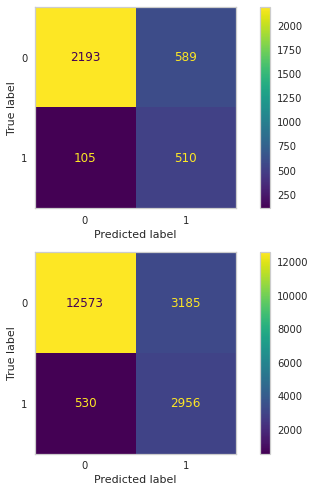

In [147]:
out_score_rf_tf = eval_metric_classification(
    grid_model, X_train_tf_idf, y_train, X_test_tf_idf, y_test, 
    'Random Forest TF', average=None, labels=[1]
)
out_score_rf_tf

## Ada Boosting

### Countvectorizer

In [148]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=random_state)
ada.fit(X_train_count, y_train, sample_weight=classes_weights)

AdaBoostClassifier(random_state=101)

In [149]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[2307  475]
 [ 138  477]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2782
           1       0.50      0.78      0.61       615

    accuracy                           0.82      3397
   macro avg       0.72      0.80      0.75      3397
weighted avg       0.86      0.82      0.83      3397

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     15758
           1       0.50      0.78      0.61      3486

    accuracy                           0.82     19244
   macro avg       0.72      0.81      0.75     19244
weighted avg       0.86      0.82      0.83     19244



In [150]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = AdaBoostClassifier(n_estimators=50, random_state=random_state)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_precision_neg  \
0     1.010       0.064          0.814           0.818               0.491   
1     0.986       0.059          0.814           0.820               0.491   
2     1.017       0.063          0.811           0.822               0.487   
3     1.028       0.066          0.813           0.822               0.490   
4     1.006       0.065          0.812           0.820               0.488   

   train_precision_neg  test_recall_neg  train_recall_neg  test_f1_neg  \
0                0.498            0.780             0.778        0.603   
1                0.503            0.750             0.786        0.593   
2                0.506            0.783             0.783        0.601   
3                0.506            0.769             0.787        0.599   
4                0.502            0.755             0.792        0.593   

   train_f1_neg  
0         0.607  
1         0.613  
2         0.615  
3         0.616  
4         0.615

test_accuracy         0.813
train_accuracy        0.821
test_precision_neg    0.489
train_precision_neg   0.503
test_recall_neg       0.768
train_recall_neg      0.785
test_f1_neg           0.598
train_f1_neg          0.613
dtype: float64

In [151]:
from sklearn.model_selection import GridSearchCV

model = AdaBoostClassifier(
    random_state=random_state
)
param_grid = {
    'n_estimators': np.linspace(50, 150, 3, dtype=int),
    'learning_rate': np.linspace(0.001, 1, 5).round(3),
}
recall_neg = make_scorer(recall_score, average=None, labels=[1])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = recall_neg,   
    n_jobs = -1,
    cv=5,
)

In [152]:
%%time
grid_model.fit(X_train_count, y_train, sample_weight=classes_weights)

CPU times: user 2.16 s, sys: 118 ms, total: 2.27 s
Wall time: 2min 6s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': array([0.001, 0.251, 0.5  , 0.75 , 1.   ]),
                         'n_estimators': array([ 50, 100, 150])},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [153]:
grid_model.best_params_

{'learning_rate': 0.001, 'n_estimators': 50}

In [154]:
grid_model.best_score_

0.9561082494357726

In [155]:
print("Ada MODEL")
eval(grid_model, X_train_count, X_test_count)

Ada MODEL
[[ 474 2308]
 [  34  581]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.17      0.29      2782
           1       0.20      0.94      0.33       615

    accuracy                           0.31      3397
   macro avg       0.57      0.56      0.31      3397
weighted avg       0.80      0.31      0.30      3397

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.17      0.29     15758
           1       0.20      0.96      0.34      3486

    accuracy                           0.31     19244
   macro avg       0.58      0.56      0.31     19244
weighted avg       0.81      0.31      0.30     19244



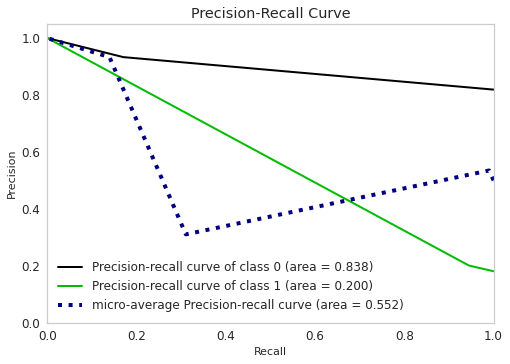

In [156]:
y_probas = grid_model.predict_proba(X_test_count)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.93      0.17      0.29      2782
           1       0.20      0.94      0.33       615

    accuracy                           0.31      3397
   macro avg       0.57      0.56      0.31      3397
weighted avg       0.80      0.31      0.30      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.95      0.17      0.29     15758
           1       0.20      0.96      0.34      3486

    accuracy                           0.31     19244
   macro avg       0.58      0.56      0.31     19244
weighted avg       0.81      0.31      0.30     19244



accuracy_test  f1_test  recall_test  precision_test  \
Ada Boosting Count          0.311    0.332        0.945           0.201   

                    accuracy_train  f1_train  recall_train  precision_train  
Ada Boosting Count           0.314     0.336         0.956            0.203

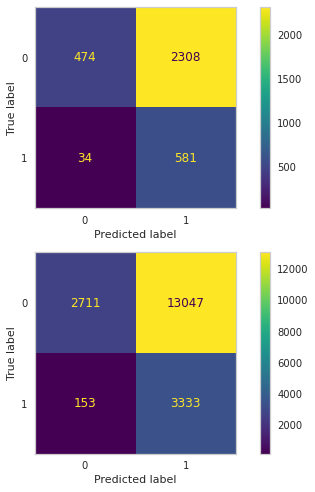

In [157]:
out_score_ada = eval_metric_classification(
    grid_model, X_train_count, y_train, X_test_count, y_test, 
    'Ada Boosting Count', average=None, labels=[1]
)
out_score_ada

### TF-IDF

In [158]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=random_state)
ada.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

AdaBoostClassifier(random_state=101)

In [159]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[2296  486]
 [ 173  442]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      2782
           1       0.48      0.72      0.57       615

    accuracy                           0.81      3397
   macro avg       0.70      0.77      0.72      3397
weighted avg       0.85      0.81      0.82      3397

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.83      0.89     15758
           1       0.51      0.77      0.61      3486

    accuracy                           0.82     19244
   macro avg       0.73      0.80      0.75     19244
weighted avg       0.86      0.82      0.84     19244



In [160]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
            'f1_neg': make_scorer(f1_score, average=None, labels=[1])}

model = AdaBoostClassifier(n_estimators=50, random_state=random_state)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_precision_neg  \
0     2.775       0.057          0.790           0.799               0.454   
1     2.775       0.058          0.789           0.801               0.452   
2     2.769       0.057          0.785           0.801               0.447   
3     2.754       0.060          0.799           0.804               0.468   
4     2.775       0.059          0.790           0.802               0.453   

   train_precision_neg  test_recall_neg  train_recall_neg  test_f1_neg  \
0                0.469            0.798             0.825        0.579   
1                0.472            0.769             0.817        0.569   
2                0.472            0.786             0.828        0.570   
3                0.476            0.789             0.821        0.587   
4                0.473            0.782             0.827        0.574   

   train_f1_neg  
0         0.598  
1         0.598  
2         0.601  
3         0.603  
4         0.602

test_accuracy         0.790
train_accuracy        0.801
test_precision_neg    0.455
train_precision_neg   0.472
test_recall_neg       0.785
train_recall_neg      0.824
test_f1_neg           0.576
train_f1_neg          0.600
dtype: float64

In [161]:
model = AdaBoostClassifier(random_state=random_state)
param_grid = {
    'n_estimators': np.linspace(10, 40, 3, dtype=int),
    'learning_rate': np.linspace(0.001, 1, 5).round(3),
}
recall_neg = make_scorer(recall_score, average=None, labels=[1])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = recall_neg,   
    n_jobs = -1,
    cv=5,
)

In [162]:
%%time
grid_model.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

CPU times: user 1.49 s, sys: 68.9 ms, total: 1.55 s
Wall time: 1min 17s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': array([0.001, 0.251, 0.5  , 0.75 , 1.   ]),
                         'n_estimators': array([10, 25, 40])},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [163]:
grid_model.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [164]:
grid_model.best_score_

0.9710264621607955

In [165]:
print("Ada MODEL")
eval(grid_model, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[ 399 2383]
 [  24  591]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.14      0.25      2782
           1       0.20      0.96      0.33       615

    accuracy                           0.29      3397
   macro avg       0.57      0.55      0.29      3397
weighted avg       0.81      0.29      0.26      3397

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.15      0.26     15758
           1       0.20      0.97      0.33      3486

    accuracy                           0.30     19244
   macro avg       0.58      0.56      0.30     19244
weighted avg       0.82      0.30      0.27     19244



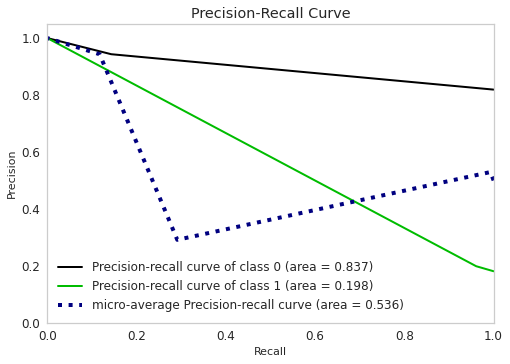

In [166]:
y_probas = grid_model.predict_proba(X_test_tf_idf)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.94      0.14      0.25      2782
           1       0.20      0.96      0.33       615

    accuracy                           0.29      3397
   macro avg       0.57      0.55      0.29      3397
weighted avg       0.81      0.29      0.26      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.15      0.26     15758
           1       0.20      0.97      0.33      3486

    accuracy                           0.30     19244
   macro avg       0.58      0.56      0.30     19244
weighted avg       0.82      0.30      0.27     19244



accuracy_test  f1_test  recall_test  precision_test  \
Ada Boosting TF          0.291    0.329        0.961           0.199   

                 accuracy_train  f1_train  recall_train  precision_train  
Ada Boosting TF           0.299     0.335         0.973            0.202

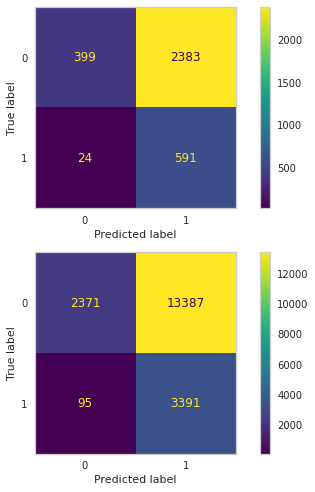

In [167]:
out_score_ada_tf = eval_metric_classification(
    grid_model, X_train_tf_idf, y_train, X_test_tf_idf, y_test, 
    'Ada Boosting TF', average=None, labels=[1]
)
out_score_ada_tf

## XGBoost

### Countvectorizer

In [168]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=random_state)
xgb.fit(X_train_count, y_train, sample_weight=classes_weights)

XGBClassifier(random_state=101)

In [169]:
print("XGB MODEL")
eval(xgb, X_train_count, X_test_count)

XGB MODEL
[[2234  548]
 [ 114  501]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      2782
           1       0.48      0.81      0.60       615

    accuracy                           0.81      3397
   macro avg       0.71      0.81      0.74      3397
weighted avg       0.87      0.81      0.82      3397

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     15758
           1       0.50      0.85      0.63      3486

    accuracy                           0.82     19244
   macro avg       0.73      0.83      0.75     19244
weighted avg       0.88      0.82      0.83     19244



In [170]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
           'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
           'f1_neg': make_scorer(f1_score, average=None, labels=[1]),
           'log_los_neg': 'neg_log_loss'} # or make_scorer(log_loss, greater_is_better=False, needs_proba=True)

model = XGBClassifier(random_state=random_state)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_precision_neg  \
0     1.922       0.060          0.803           0.822               0.475   
1     1.839       0.059          0.806           0.823               0.479   
2     1.813       0.061          0.803           0.821               0.474   
3     1.811       0.060          0.799           0.824               0.469   
4     1.803       0.069          0.815           0.824               0.493   

   train_precision_neg  test_recall_neg  train_recall_neg  test_f1_neg  \
0                0.505            0.813             0.854        0.600   
1                0.506            0.799             0.859        0.599   
2                0.504            0.818             0.863        0.600   
3                0.509            0.805             0.864        0.593   
4                0.509            0.825             0.856        0.617   

   train_f1_neg  test_log_los_neg  train_log_los_neg  
0         0.634            -0.457             -0.441  
1         0.637            -0.458             -0.439  
2         0.636            -0.459             -0.441  
3         0.640            -0.464             -0.438  
4         0.638            -0.455             -0.442

test_accuracy          0.805
train_accuracy         0.823
test_precision_neg     0.478
train_precision_neg    0.506
test_recall_neg        0.812
train_recall_neg       0.859
test_f1_neg            0.602
train_f1_neg           0.637
test_log_los_neg      -0.459
train_log_los_neg     -0.440
dtype: float64

In [171]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    random_state=random_state
)
param_grid = {
    'n_estimators': np.linspace(10, 40, 3, dtype=int),
    'learning_rate': np.linspace(0.01, 1, 5).round(3),
}
recall_neg = make_scorer(recall_score, average=None, labels=[1])
log_loss_neg = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = 'neg_log_loss', # or log_loss_neg    
    n_jobs = -1,
    cv=5,
)

In [172]:
%%time
grid_model.fit(X_train_count, y_train, sample_weight=classes_weights)

CPU times: user 1.57 s, sys: 85.6 ms, total: 1.66 s
Wall time: 37.9 s


GridSearchCV(cv=5, estimator=XGBClassifier(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': array([0.01 , 0.258, 0.505, 0.752, 1.   ]),
                         'n_estimators': array([10, 25, 40])},
             scoring='neg_log_loss')

In [173]:
grid_model.best_params_

{'learning_rate': 0.752, 'n_estimators': 40}

In [174]:
grid_model.best_score_

-0.39211334088132155

In [175]:
print("XGB MODEL")
eval(xgb, X_train_count, X_test_count)

XGB MODEL
[[2234  548]
 [ 114  501]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      2782
           1       0.48      0.81      0.60       615

    accuracy                           0.81      3397
   macro avg       0.71      0.81      0.74      3397
weighted avg       0.87      0.81      0.82      3397

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     15758
           1       0.50      0.85      0.63      3486

    accuracy                           0.82     19244
   macro avg       0.73      0.83      0.75     19244
weighted avg       0.88      0.82      0.83     19244



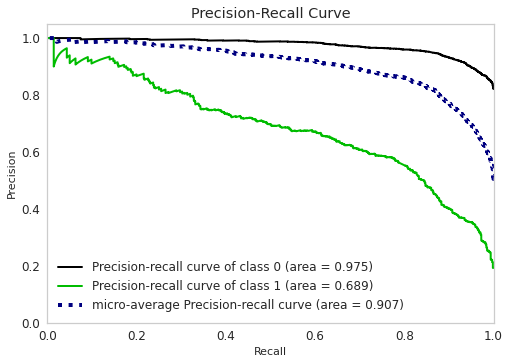

In [176]:
y_probas = grid_model.predict_proba(X_test_count)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.84      0.90      2782
           1       0.54      0.82      0.65       615

    accuracy                           0.84      3397
   macro avg       0.74      0.83      0.77      3397
weighted avg       0.88      0.84      0.85      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     15758
           1       0.57      0.88      0.69      3486

    accuracy                           0.86     19244
   macro avg       0.77      0.87      0.80     19244
weighted avg       0.90      0.86      0.87     19244



accuracy_test  f1_test  recall_test  precision_test  \
XGBoost Count          0.838    0.646        0.816           0.535   

               accuracy_train  f1_train  recall_train  precision_train  
XGBoost Count           0.858     0.693         0.882            0.570

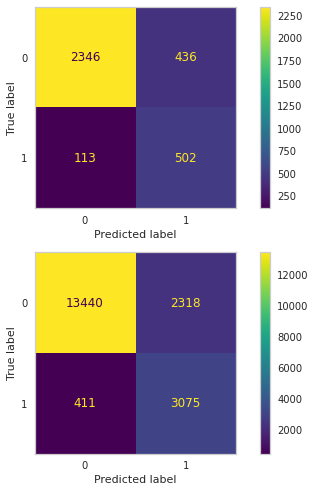

In [177]:
out_score_xgb = eval_metric_classification(
    grid_model, X_train_count, y_train, X_test_count, y_test, 
    'XGBoost Count', average=None, labels=[1]
)
out_score_xgb

### TF-IDF

In [178]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=random_state)
xgb.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

XGBClassifier(random_state=101)

In [179]:
print("XGB MODEL")
eval(xgb, X_train_tf_idf, X_test_tf_idf)

XGB MODEL
[[2205  577]
 [ 113  502]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2782
           1       0.47      0.82      0.59       615

    accuracy                           0.80      3397
   macro avg       0.71      0.80      0.73      3397
weighted avg       0.86      0.80      0.82      3397

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     15758
           1       0.51      0.88      0.64      3486

    accuracy                           0.82     19244
   macro avg       0.74      0.84      0.76     19244
weighted avg       0.88      0.82      0.84     19244



In [180]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision_neg': make_scorer(precision_score, average=None, labels=[1]),
           'recall_neg': make_scorer(recall_score, average=None, labels=[1]),
           'f1_neg': make_scorer(f1_score, average=None, labels=[1]),
           'log_los_neg': 'neg_log_loss'} # or make_scorer(log_loss, greater_is_better=False, needs_proba=True)

model = XGBClassifier(random_state=random_state)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_precision_neg  \
0     4.423       0.065          0.794           0.825               0.460   
1     4.359       0.062          0.816           0.829               0.494   
2     4.285       0.066          0.803           0.827               0.474   
3     4.273       0.063          0.797           0.827               0.466   
4     4.364       0.062          0.802           0.826               0.474   

   train_precision_neg  test_recall_neg  train_recall_neg  test_f1_neg  \
0                0.509            0.811             0.873        0.587   
1                0.517            0.809             0.880        0.614   
2                0.513            0.815             0.883        0.599   
3                0.513            0.807             0.878        0.591   
4                0.511            0.836             0.883        0.605   

   train_f1_neg  test_log_los_neg  train_log_los_neg  
0         0.643            -0.456             -0.431  
1         0.651            -0.450             -0.428  
2         0.649            -0.453             -0.427  
3         0.647            -0.460             -0.427  
4         0.647            -0.453             -0.432

test_accuracy          0.802
train_accuracy         0.827
test_precision_neg     0.474
train_precision_neg    0.513
test_recall_neg        0.816
train_recall_neg       0.879
test_f1_neg            0.599
train_f1_neg           0.648
test_log_los_neg      -0.454
train_log_los_neg     -0.429
dtype: float64

In [181]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    random_state=random_state
)
param_grid = {
    'n_estimators': np.linspace(10, 40, 3, dtype=int),
    'learning_rate': np.linspace(0.01, 1, 5).round(3),
}
recall_neg = make_scorer(recall_score, average=None, labels=[0])
log_loss_neg = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = 'neg_log_loss', # or log_loss_neg  
    n_jobs = -1,
    cv=5,
)

In [182]:
%%time
grid_model.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

CPU times: user 3.07 s, sys: 113 ms, total: 3.18 s
Wall time: 1min 22s


GridSearchCV(cv=5, estimator=XGBClassifier(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': array([0.01 , 0.258, 0.505, 0.752, 1.   ]),
                         'n_estimators': array([10, 25, 40])},
             scoring='neg_log_loss')

In [183]:
grid_model.best_params_

{'learning_rate': 0.752, 'n_estimators': 40}

In [184]:
grid_model.best_score_

-0.38794616642523605

In [185]:
print("XGB MODEL")
eval(xgb, X_train_tf_idf, X_test_tf_idf)

XGB MODEL
[[2205  577]
 [ 113  502]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2782
           1       0.47      0.82      0.59       615

    accuracy                           0.80      3397
   macro avg       0.71      0.80      0.73      3397
weighted avg       0.86      0.80      0.82      3397

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     15758
           1       0.51      0.88      0.64      3486

    accuracy                           0.82     19244
   macro avg       0.74      0.84      0.76     19244
weighted avg       0.88      0.82      0.84     19244



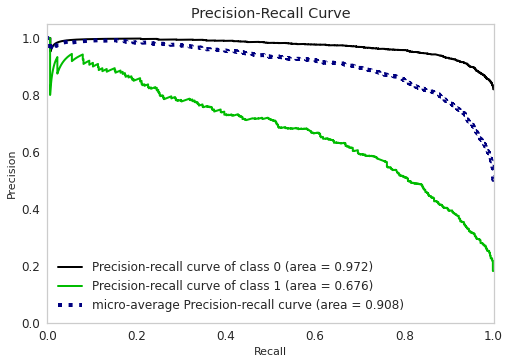

In [186]:
y_probas = grid_model.predict_proba(X_test_tf_idf)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2782
           1       0.52      0.79      0.63       615

    accuracy                           0.83      3397
   macro avg       0.73      0.81      0.76      3397
weighted avg       0.87      0.83      0.84      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     15758
           1       0.58      0.90      0.70      3486

    accuracy                           0.86     19244
   macro avg       0.78      0.88      0.81     19244
weighted avg       0.90      0.86      0.87     19244



accuracy_test  f1_test  recall_test  precision_test  \
XGBoost TF          0.829    0.889        0.837           0.948   

            accuracy_train  f1_train  recall_train  precision_train  
XGBoost TF           0.863     0.911         0.855            0.975

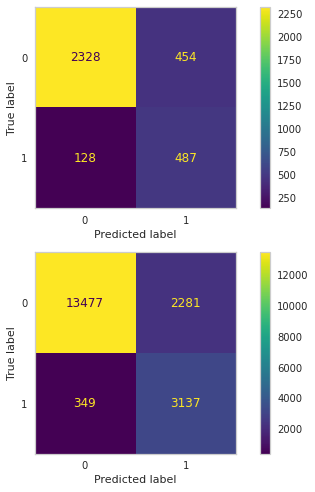

In [187]:
out_score_xgb_tf = eval_metric_classification(
    grid_model, X_train_tf_idf, y_train, X_test_tf_idf, y_test, 
    'XGBoost TF', average=None, labels=[0]
)
out_score_xgb_tf

# DL modeling

## Short Review Word2Vec

In [188]:
from gensim.models import Word2Vec
import re

In [189]:
label = df_original["Review Text"]
text = "\n".join(label.astype(str))
text

Output hidden; open in https://colab.research.google.com to view.

In [190]:
text_list = re.split('[\n.!]', text)
text_list[:5]

['Absolutely wonderful - silky and sexy and comfortable',
 'Love this dress',
 "  it's sooo pretty",
 "  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite",
 '  i bought a petite and am 5\'8"']

In [191]:
corpus = []

for sent in text_list:
    corpus.append(sent.split())
    
print(corpus[:2])

[['Absolutely', 'wonderful', '-', 'silky', 'and', 'sexy', 'and', 'comfortable'], ['Love', 'this', 'dress']]


In [192]:
model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1) # vector_size=100

In [193]:
# feature represent
model.wv['dress']

array([ 0.19797036,  0.03523039, -0.56653976, -0.03224303,  0.29395416,
       -0.22046012,  0.46820894,  0.39677438, -0.46194962, -0.35858312,
        0.04162146, -0.25973812,  0.14138131, -0.07351292,  0.16882247,
       -0.00127193,  0.13881655,  0.10838724,  0.23405355, -0.09757645,
       -0.4059891 ,  0.19164965,  0.10869775,  0.11554512, -0.1246144 ,
       -0.3868189 ,  0.35849822,  0.21709028, -0.30457568, -0.19835584,
        0.21056439, -0.31485268,  0.10598123, -0.00606073,  0.06635489,
        0.38342473,  0.23219952,  0.14684059,  0.03858726, -0.1674529 ,
        0.42620632,  0.40868738, -0.2611593 , -0.2236006 , -0.16816027,
        0.07060707,  0.06498311, -0.18928963, -0.19370636,  0.09720641,
       -0.03943432,  0.09285985, -0.00773712,  0.08283944, -0.23301072,
       -0.42772526,  0.5092728 ,  0.26012856, -0.12359814,  0.40817013,
       -0.54010165, -0.190947  ,  0.1553979 , -0.12975658, -0.51119673,
        0.50608325,  0.5377691 ,  0.3061033 ,  0.06958579,  0.08

In [194]:
print(model.wv.most_similar('dress'))

[('blouse', 0.8212523460388184), ('jumpsuit', 0.8049137592315674), ('top', 0.7890142202377319), ('skirt', 0.7752196192741394), ('romper', 0.7747737169265747), ('swimsuit', 0.7637637257575989), ('dress,', 0.7540676593780518), ('shirt', 0.7487413883209229), ('sweater', 0.7382032871246338), ('pullover', 0.7143948078155518)]


In [195]:
model.wv.most_similar(positive=['man', 'blouse'], negative=['woman'], topn=5)

[('eyelet', 0.8016549944877625),
 ('macrame', 0.7950628995895386),
 ('windowpane', 0.7624452114105225),
 ('shimmery', 0.7606372237205505),
 ('exquisite', 0.759911298751831)]

## Import Libraries

In [196]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Activation, BatchNormalization, Dropout, Dense
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, Adamax
from tensorflow.keras.callbacks import EarlyStopping

## DL Data Preproccessing

In [197]:
df = pd.DataFrame(df_original[["Recommended IND", "Review Text"]].values, columns=['recommended', 'text'])
df['not_recommended'] = df['recommended'].map({0 : 1, 1: 0})
df = df.dropna().reset_index(drop=True)
df

recommended                                               text  \
0               1  Absolutely wonderful - silky and sexy and comf...   
1               1  Love this dress!  it's sooo pretty.  i happene...   
2               0  I had such high hopes for this dress and reall...   
3               1  I love, love, love this jumpsuit. it's fun, fl...   
4               1  This shirt is very flattering to all due to th...   
...           ...                                                ...   
22636           1  I was very happy to snag this dress at such a ...   
22637           1  It reminds me of maternity clothes. soft, stre...   
22638           0  This fit well, but the top was very see throug...   
22639           1  I bought this dress for a wedding i have this ...   
22640           1  This dress in a lovely platinum is feminine an...   

       not_recommended  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  
...                ...  
22636                0  
22637                0  
22638                1  
22639                0  
22640                0  

[22641 rows x 3 columns]

In [198]:
X = df['text']
y = df['not_recommended']

### Tokenization

#### Define Max Token Number for Transforming

In [199]:
# select max tokens number
# num_words = 15000

tokenizer = Tokenizer(num_words=None) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 
tokenizer.fit_on_texts(X)

In [200]:
# butün data yı kullanıyorsak token sayısı
num_words = len(tokenizer.index_word)+1

### Creating word index

In [201]:
print(tokenizer.index_word)
print(tokenizer.word_index)
print(tokenizer.word_counts)

{1: 'the', 2: 'i', 3: 'and', 4: 'a', 5: 'it', 6: 'is', 7: 'this', 8: 'to', 9: 'in', 10: 'but', 11: 'on', 12: 'for', 13: 'of', 14: 'with', 15: 'was', 16: 'so', 17: 'my', 18: 'dress', 19: 'not', 20: 'that', 21: 'love', 22: 'size', 23: 'very', 24: 'have', 25: 'top', 26: 'fit', 27: 'are', 28: 'like', 29: 'be', 30: 'as', 31: 'me', 32: 'wear', 33: "it's", 34: 'great', 35: 'too', 36: "i'm", 37: 'or', 38: 'am', 39: 'just', 40: 'you', 41: 'would', 42: 'they', 43: 'up', 44: 'at', 45: 'fabric', 46: 'small', 47: 'color', 48: 'look', 49: 'if', 50: 'more', 51: 'really', 52: 'ordered', 53: 'little', 54: 'perfect', 55: 'will', 56: 'one', 57: 'these', 58: 'flattering', 59: 'well', 60: 'an', 61: 'soft', 62: 'out', 63: 'back', 64: 'because', 65: 'had', 66: 'can', 67: '\r', 68: 'comfortable', 69: 'cute', 70: 'nice', 71: 'than', 72: 'bought', 73: 'beautiful', 74: 'when', 75: 'all', 76: 'looks', 77: 'bit', 78: 'fits', 79: 'large', 80: 'shirt', 81: 'down', 82: 'which', 83: 'material', 84: 'much', 85: 'them',

In [202]:
pd.Series(tokenizer.index_word)

1                the
2                  i
3                and
4                  a
5                 it
            ...     
14843        donse't
14844     population
14845    camoflauges
14846        blaring
14847       platinum
Length: 14847, dtype: object

In [203]:
# most repaeting tokens
tokens = pd.Series(tokenizer.word_counts).sort_values(ascending=False)
tokens

the         76164
i           59314
and         49009
a           43017
it          42817
            ...  
yo'self         1
detaches        1
odette          1
oblong          1
platinum        1
Length: 14847, dtype: int64

In [204]:
tokens[tokens==1].count()

6346

In [205]:
len(tokenizer.word_index), tokens.count()

(14847, 14847)

### Converting tokens to numeric

In [206]:
X_num_tokens = tokenizer.texts_to_sequences(X)
X_num_tokens[:1]

[[253, 532, 917, 3, 662, 3, 68]]

In [207]:
pd.DataFrame(X_num_tokens)

0     1       2       3        4         5       6        7        8    \
0      253   532 917.000   3.000  662.000     3.000  68.000      NaN      NaN   
1       21     7  18.000  33.000 1713.000    99.000   2.000 1322.000    8.000   
2        2    65 312.000 178.000 1095.000    12.000   7.000   18.000    3.000   
3        2    21  21.000  21.000    7.000   630.000  33.000  283.000 1302.000   
4        7    80   6.000  23.000   58.000     8.000  75.000  486.000    8.000   
...    ...   ...     ...     ...      ...       ...     ...      ...      ...   
22636    2    15  23.000 287.000    8.000   992.000   7.000   18.000   44.000   
22637    5  1496  31.000  13.000  687.000   633.000  61.000  456.000 1803.000   
22638    7    26  59.000  10.000    1.000    25.000  15.000   23.000  121.000   
22639    2    72   7.000  18.000   12.000     4.000 592.000    2.000   24.000   
22640    7    18   9.000   4.000  193.000 14847.000   6.000  385.000    3.000   

          9        10      11      12      13      14      15      16   \
0         NaN      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     221.000    5.000   9.000   4.000 106.000   3.000  36.000 314.000   
2      51.000  195.000   5.000   8.000 102.000  12.000  31.000   2.000   
3       3.000  788.000 316.000 183.000   2.000  32.000   5.000   2.000   
4       1.000 1157.000 156.000 467.000   5.000   6.000   1.000  54.000   
...       ...      ...     ...     ...     ...     ...     ...     ...   
22636 312.000    4.000  34.000 162.000  33.000  23.000 277.000   8.000   
22637  83.000  120.000   6.000  58.000   3.000 549.000 258.000   2.000   
22638 203.000    7.000 429.000  41.000  24.000 561.000  12.000  31.000   
22639   7.000  138.000   3.000  33.000  16.000  69.000 302.000   1.000   
22640  78.000  150.000 277.000   8.000  32.000   3.000 242.000  35.000   

           17      18       19      20      21      22      23      24   \
0          NaN     NaN      NaN     NaN     NaN     NaN     NaN     NaN   
1        2.000 131.000 1243.000   2.000 429.000  41.000  24.000  52.000   
2     1152.000  52.000    1.000  95.000  46.000  17.000 236.000  22.000   
3      115.000 533.000   10.000  34.000 210.000     NaN     NaN     NaN   
4       86.000   8.000   32.000  14.000 268.000   3.000   5.000   6.000   
...        ...     ...      ...     ...     ...     ...     ...     ...   
22636  376.000  11.000    3.000  89.000   4.000  23.000  58.000 120.000   
22637  117.000 219.000   56.000 371.000   8.000 699.000 156.000 157.000   
22638   36.000 314.000    2.000  15.000 427.000   8.000 179.000   5.000   
22639   26.000 373.000   54.000   1.000  97.000  78.000  17.000  94.000   
22640  433.000 205.000      NaN     NaN     NaN     NaN     NaN     NaN   

           25      26       27      28     29      30       31      32   \
0          NaN     NaN      NaN     NaN    NaN     NaN      NaN     NaN   
1        5.000 136.000 1243.000  33.000 95.000   2.000   72.000   4.000   
2       10.000   2.000  219.000   7.000  8.000  29.000 6689.000  46.000   
3          NaN     NaN      NaN     NaN    NaN     NaN      NaN     NaN   
4     1190.000  16.000    5.000 831.000 59.000  14.000  251.000 395.000   
...        ...     ...      ...     ...    ...     ...      ...     ...   
22636    3.000  47.000 1156.000     NaN    NaN     NaN      NaN     NaN   
22637  773.000  70.000   90.000 135.000 19.000  12.000   31.000  10.000   
22638   11.000   9.000    1.000 106.000  3.000 124.000  241.000   5.000   
22639  150.000  10.000   15.000 116.000 35.000  90.000    3.000  35.000   
22640      NaN     NaN      NaN     NaN    NaN     NaN      NaN     NaN   

          33     34      35      36      37      38      39      40      41   \
0         NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1      95.000  3.000  38.000 501.000   2.000  21.000   1.000  86.000  11.000   
2      16.000 46.000   9.000 661.000  20.000   2.000 118.000  19.000 784.000   
3         NaN    NaN   

In [208]:
X[0]

'Absolutely wonderful - silky and sexy and comfortable'

In [209]:
print(X_num_tokens[0])

[253, 532, 917, 3, 662, 3, 68]


### Maximum number of tokens for all documents¶

In [210]:
len(X_num_tokens[0])

7

In [211]:
num_tokens_doc = [len(tokens) for tokens in X_num_tokens]
num_tokens_doc = np.array(num_tokens_doc)
num_tokens_doc.shape

(22641,)

In [212]:
arr = num_tokens_doc
 
print("Descriptive analysis")
print("Document Size \t=", arr.shape[0])
print("Doc Token Count\t=", arr)

# measures of central tendency
print("Measures of Central Tendency")
print("Mean \t\t=", arr.mean())
print("Median \t\t=", np.median(arr))
print("Mode \t\t=", stats.mode(arr)[0][0])

# measures of dispersion
print("Measures of Dispersion")
print("Minimum \t=", arr.min())
print("Maximum \t=", arr.max())
print("Range \t\t=", arr.ptp())
print("Variance \t=", arr.var())
print("Standard Deviation =", arr.std())

Descriptive analysis
Document Size 	= 22641
Doc Token Count	= [ 7 62 97 ... 42 85 19]
Measures of Central Tendency
Mean 		= 60.60699615741354
Median 		= 59.0
Mode 		= 96
Measures of Dispersion
Minimum 	= 2
Maximum 	= 116
Range 		= 114
Variance 	= 829.4561658852818
Standard Deviation = 28.80028065636309


<AxesSubplot:ylabel='Frequency'>

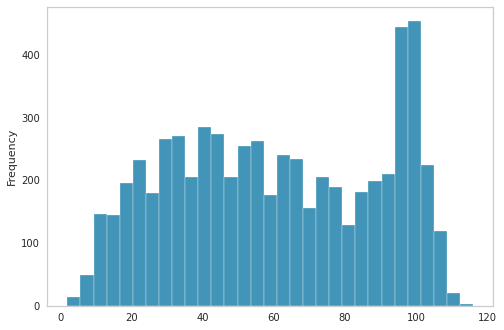

In [213]:
sns.histplot(x=num_tokens_doc, stat='frequency')

In [214]:
len(num_tokens_doc[num_tokens_doc==100])

422

In [215]:
num_tokens_doc.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

16263

In [216]:
X[num_tokens_doc.argmax()]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [217]:
len(X_num_tokens[num_tokens_doc.argmax()])

116

#### Define Max Tokens for Padding

In [218]:
max_tokens = 117

In [219]:
sum(num_tokens_doc < max_tokens) / len(num_tokens_doc)

1.0

In [220]:
sum(num_tokens_doc <= max_tokens)

22641

### Fixing token counts of all documents (pad_sequences)

In [221]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)
X_pad.shape

(22641, 117)

In [222]:
pd.DataFrame(X_pad)

0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
0        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
22636    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
22637    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
22638    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
22639    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
22640    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

       14   15   16   17   18   19   20   21   22   23    24   25   26   27   \
0        0    0    0    0    0    0    0    0    0    0     0    0    0    0   
1        0    0    0    0    0    0    0    0    0    0     0    0    0    0   
2        0    0    0    0    0    0    2   65  312  178  1095   12    7   18   
3        0    0    0    0    0    0    0    0    0    0     0    0    0    0   
4        0    0    0    0    0    0    0    0    0    0     0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...   
22636    0    0    0    0    0    0    0    0    0    0     0    0    0    0   
22637    0    0    0    0    0    0    0    0    0    0     0    0    0    0   
22638    0    0    0    0    0    0    0    0    0    0     0    0    0    0   
22639    0    0    0    0    0    0    0    0    0    0     0    0    0    0   
22640    0    0    0    0    0    0    0    0    0    0     0    0    0    0   

       28   29   30   31   32   33   34   35   36    37   38   39   40   41   \
0        0    0    0    0    0    0    0    0    0     0    0    0    0    0   
1        0    0    0    0    0    0    0    0    0     0    0    0    0    0   
2        3   51  195    5    8  102   12   31    2  1152   52    1   95   46   
3        0    0    0    0    0    0    0    0    0     0    0    0    0    0   
4        0    0    0    0    0    0    0    0    0     0    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...   
22636    0    0    0    0    0    0    0    0    0     0    0    0    0    0   
22637    0    0    0    0    0    0    0    0    0     0    0    0    0    0   
22638    0    0    0    0    0    0    0    0    0     0    0    0    0    0   
22639    0    0    0    0    2   72    7   18   12     4  592    2   24    7   
22640    0    0    0    0    0    0    0    0    0     0    0    0    0    0   

       42   43   44   45   46   47   48   49   50    51   52   53   54   55   \
0        0    0    0    0    0    0    0    0    0     0    0    0    0    0   
1        0    0    0    0    0    0    0    0    0     0    0    0    0   21   
2       17  236   22   10    2  219    7    8   29  6689   46   16   46    9   
3        0    0    0    0    0    0    0    0    0     0    0    0    0    0   
4        0    0    0    0    0    0    0    0    0     0    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...   
22636    0    0    0    0    0    0    0    0    0     0    0    0    0    0   
22637    0    0    0    0    0    0    0    0    0     0    0    0    0    0   
22638    0    0    0    0    0    0    0    0    0     0    0    0    0    0   
22639  138    3   33   16   69  302    1   26  373    54    1   97   78   17   
22640    0    0    0    0    0    0    0    0    0     0    0    0    0    0   

       56   57   58    59   60   61    62   63   64    65   66   67   68   \
0        0    0    0     0    0    0     0    0    0     0    0    0    0   
1        7   18   33 

In [223]:
np.array(X_num_tokens[0])

array([253, 532, 917,   3, 662,   3,  68])

In [224]:
np.array(X_pad[0])

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 253, 532, 917,   3, 662,   3,  68],
      dtype=int32)

## Train Set Split

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.15, stratify=y, random_state=random_state)

## Modeling

In [227]:
num_words, max_tokens

(14848, 117)

In [228]:
tf.keras.backend.clear_session()
embedding_size = 128 

model = Sequential()
model.add(Embedding(input_dim=num_words,       # 14848
                    output_dim=embedding_size, # feature represent word embeding
                    input_length=max_tokens))  # 116
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(GRU(units=128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(GRU(units=256, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(GRU(units=128))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0007)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', 'Recall', 'Precision', 'AUC', precision_at_recall])

In [229]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 117, 128)          1900544   
                                                                 
 batch_normalization (BatchN  (None, 117, 128)         512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 117, 128)          0         
                                                                 
 gru (GRU)                   (None, 117, 128)          99072     
                                                                 
 batch_normalization_1 (Batc  (None, 117, 128)         512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 117, 128)          0

In [230]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose = 1, patience = 1, restore_best_weights=True)

In [231]:
%%time
model.fit(X_train, y_train, epochs=10, batch_size=32, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
602/602 [==============================] - 29s 29ms/step - loss: 0.4609 - accuracy: 0.7629 - recall: 0.8262 - precision: 0.4212 - auc: 0.8689 - precision_at_recall: 0.4406 - val_loss: 0.4124 - val_accuracy: 0.8343 - val_recall: 0.9041 - val_precision: 0.5245 - val_auc: 0.9330 - val_precision_at_recall: 0.6296
Epoch 2/10
602/602 [==============================] - 16s 27ms/step - loss: 0.2772 - accuracy: 0.8805 - recall: 0.9102 - precision: 0.6149 - auc: 0.9519 - precision_at_recall: 0.7205 - val_loss: 0.3369 - val_accuracy: 0.8613 - val_recall: 0.8618 - val_precision: 0.5786 - val_auc: 0.9308 - val_precision_at_recall: 0.6343
Epoch 2: early stopping
CPU times: user 49.8 s, sys: 3.06 s, total: 52.8 s
Wall time: 49.1 s


In [232]:
model.save('/content/drive/MyDrive/03-M2/Proje/Sentiment_Analysis/sentiment_analysis_gru_1.h5')

### Model evaluation

In [233]:
summary = pd.DataFrame(model.history.history)
summary.head()

loss  accuracy  recall  precision   auc  precision_at_recall  val_loss  \
0 0.461     0.763   0.826      0.421 0.869                0.441     0.412   
1 0.277     0.880   0.910      0.615 0.952                0.721     0.337   

   val_accuracy  val_recall  val_precision  val_auc  val_precision_at_recall  
0         0.834       0.904          0.525    0.933                    0.630  
1         0.861       0.862          0.579    0.931                    0.634

In [234]:
# metrics = ['loss', 'recall', 'precision', 'accuracy', 'auc', 'precision_at_recall']
colors  = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history, metrics):
  for n, metric in enumerate(metrics):
    name = str(metric).replace("_"," ").capitalize()
    plt.subplot(3, 2, n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      # plt.ylim(plt.gca().get_ylim())
      plt.ylim([plt.ylim()[0], 1])

    plt.legend();

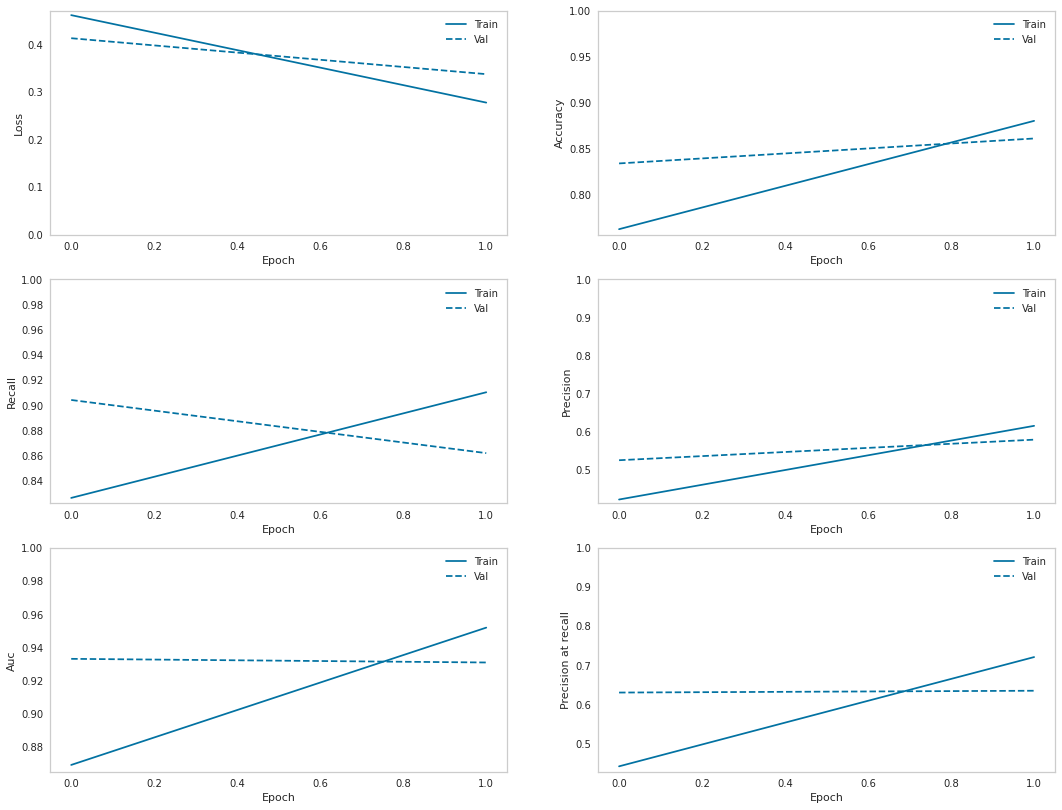

In [235]:
metrics = summary.columns[:6]
plt.figure(figsize=(18,14))
plot_metrics(model.history, metrics=metrics)

In [236]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print('TEST')
y_pred = model.predict(X_test) >= 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = model.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST
107/107 [==============================] - 2s 9ms/step
[[2278  504]
 [  59  556]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2782
           1       0.52      0.90      0.66       615

    accuracy                           0.83      3397
   macro avg       0.75      0.86      0.78      3397
weighted avg       0.89      0.83      0.85      3397

-------------------------------------------------------
TRAIN
602/602 [==============================] - 5s 9ms/step
[[13359  2399]
 [  155  3331]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     15758
           1       0.58      0.96      0.72      3486

    accuracy                           0.87     19244
   macro avg       0.78      0.90      0.82     19244
weighted avg       0.91      0.87      0.88     19244



In [237]:
%%time
model.evaluate(X_train, y_train, return_dict=True), \
model.evaluate(X_test, y_test, return_dict=True)

107/107 [==============================] - 1s 12ms/step - loss: 0.4124 - accuracy: 0.8343 - recall: 0.9041 - precision: 0.5245 - auc: 0.9330 - precision_at_recall: 0.6296
CPU times: user 9.72 s, sys: 585 ms, total: 10.3 s
Wall time: 8.65 s


({'loss': 0.331243097782135,
  'accuracy': 0.867283284664154,
  'recall': 0.955536425113678,
  'precision': 0.5813263654708862,
  'auc': 0.9654625058174133,
  'precision_at_recall': 0.7909731864929199},
 {'loss': 0.41238680481910706,
  'accuracy': 0.8342655301094055,
  'recall': 0.9040650129318237,
  'precision': 0.5245283246040344,
  'auc': 0.9329958558082581,
  'precision_at_recall': 0.6296296119689941})

602/602 [==============================] - 5s 8ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2782
           1       0.52      0.90      0.66       615

    accuracy                           0.83      3397
   macro avg       0.75      0.86      0.78      3397
weighted avg       0.89      0.83      0.85      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     15758
           1       0.58      0.96      0.72      3486

    accuracy                           0.87     19244
   macro avg       0.78      0.90      0.82     19244
weighted avg       0.91      0.87      0.88     19244



accuracy_test  f1_test  recall_test  precision_test  \
GRU Model 1          0.834    0.664        0.904           0.525   

             accuracy_train  f1_train  recall_train  precision_train  
GRU Model 1           0.867     0.723         0.956            0.581

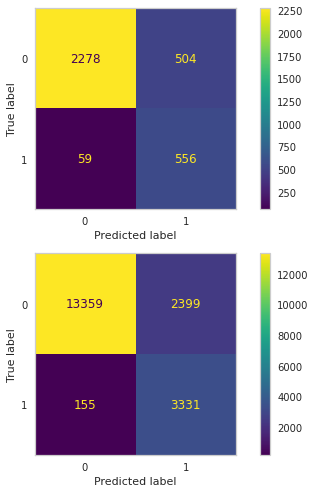

In [238]:
from tensorflow.keras.models import load_model
model_review = load_model('/content/drive/MyDrive/03-M2/Proje/Sentiment_Analysis/sentiment_analysis_gru_1.h5')

out_score_gru = eval_metric_classification(
    model_review, X_train, y_train, X_test, y_test, 
    'GRU Model 1', ml_model=False, average=None, labels=[1]
)
out_score_gru

## Model-2

In [239]:
tf.keras.backend.clear_session()
embedding_size = 128  

model = Sequential()
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(GRU(units=256, return_sequences=True))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(GRU(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(GRU(units=64))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0009)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', 'Recall', 'Precision', 'AUC', precision_at_recall])

In [240]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 117, 128)          1900544   
                                                                 
 dropout (Dropout)           (None, 117, 128)          0         
                                                                 
 batch_normalization (BatchN  (None, 117, 128)         512       
 ormalization)                                                   
                                                                 
 gru (GRU)                   (None, 117, 256)          296448    
                                                                 
 dropout_1 (Dropout)         (None, 117, 256)          0         
                                                                 
 batch_normalization_1 (Batc  (None, 117, 256)         1024      
 hNormalization)                                        

In [241]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose = 1, patience = 1, restore_best_weights=True)

In [242]:
%%time
model.fit(X_train, y_train, epochs=10, batch_size=32, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
602/602 [==============================] - 26s 34ms/step - loss: 0.4507 - accuracy: 0.7682 - recall: 0.8253 - precision: 0.4276 - auc: 0.8744 - precision_at_recall: 0.4459 - val_loss: 0.5432 - val_accuracy: 0.7645 - val_recall: 0.9512 - val_precision: 0.4317 - val_auc: 0.9342 - val_precision_at_recall: 0.6492
Epoch 2/10
602/602 [==============================] - 22s 36ms/step - loss: 0.2785 - accuracy: 0.8771 - recall: 0.9114 - precision: 0.6071 - auc: 0.9509 - precision_at_recall: 0.7088 - val_loss: 0.2881 - val_accuracy: 0.8817 - val_recall: 0.8114 - val_precision: 0.6357 - val_auc: 0.9318 - val_precision_at_recall: 0.6448
Epoch 2: early stopping
CPU times: user 54.1 s, sys: 2.36 s, total: 56.4 s
Wall time: 55.2 s


In [243]:
model.save('/content/drive/MyDrive/03-M2/Proje/Sentiment_Analysis/sentiment_analysis_gru_2.h5')

### Model evaluation

In [244]:
summary = pd.DataFrame(model.history.history)
summary.head()

loss  accuracy  recall  precision   auc  precision_at_recall  val_loss  \
0 0.451     0.768   0.825      0.428 0.874                0.446     0.543   
1 0.278     0.877   0.911      0.607 0.951                0.709     0.288   

   val_accuracy  val_recall  val_precision  val_auc  val_precision_at_recall  
0         0.764       0.951          0.432    0.934                    0.649  
1         0.882       0.811          0.636    0.932                    0.645

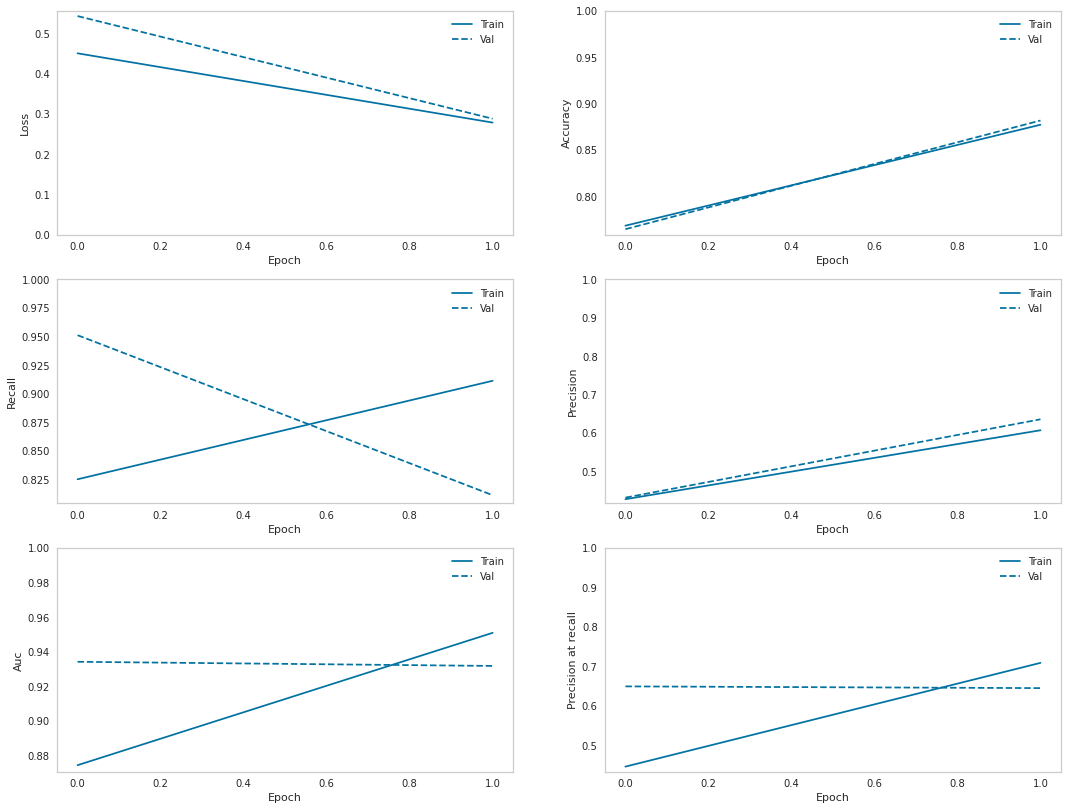

In [245]:
metrics = summary.columns[:6]
plt.figure(figsize=(18,14))
plot_metrics(model.history, metrics=metrics)

In [246]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print('TEST')
y_pred = model.predict(X_test) >= 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = model.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST
107/107 [==============================] - 2s 9ms/step
[[2012  770]
 [  30  585]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      2782
           1       0.43      0.95      0.59       615

    accuracy                           0.76      3397
   macro avg       0.71      0.84      0.71      3397
weighted avg       0.89      0.76      0.79      3397

-------------------------------------------------------
TRAIN
602/602 [==============================] - 5s 8ms/step
[[11903  3855]
 [   54  3432]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     15758
           1       0.47      0.98      0.64      3486

    accuracy                           0.80     19244
   macro avg       0.73      0.87      0.75     19244
weighted avg       0.90      0.80      0.82     19244



In [248]:
%%time
model.evaluate(X_train, y_train, return_dict=True), \
model.evaluate(X_test, y_test, return_dict=True)

107/107 [==============================] - 1s 12ms/step - loss: 0.5432 - accuracy: 0.7645 - recall: 0.9512 - precision: 0.4317 - auc: 0.9342 - precision_at_recall: 0.6492
CPU times: user 9.76 s, sys: 594 ms, total: 10.4 s
Wall time: 8.62 s


({'loss': 0.46082133054733276,
  'accuracy': 0.7968717813491821,
  'recall': 0.9845094680786133,
  'precision': 0.47097569704055786,
  'auc': 0.966350793838501,
  'precision_at_recall': 0.7856350541114807},
 {'loss': 0.5432149171829224,
  'accuracy': 0.7644981145858765,
  'recall': 0.9512194991111755,
  'precision': 0.4317343235015869,
  'auc': 0.9341791272163391,
  'precision_at_recall': 0.6492146849632263})

602/602 [==============================] - 6s 10ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      2782
           1       0.43      0.95      0.59       615

    accuracy                           0.76      3397
   macro avg       0.71      0.84      0.71      3397
weighted avg       0.89      0.76      0.79      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     15758
           1       0.47      0.98      0.64      3486

    accuracy                           0.80     19244
   macro avg       0.73      0.87      0.75     19244
weighted avg       0.90      0.80      0.82     19244



accuracy_test  f1_test  recall_test  precision_test  \
GRU Model 2          0.764    0.594        0.951           0.432   

             accuracy_train  f1_train  recall_train  precision_train  
GRU Model 2           0.797     0.637         0.985            0.471

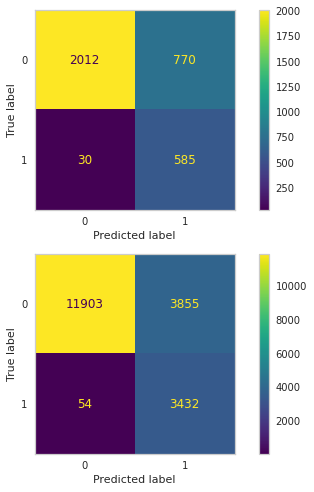

In [250]:
from tensorflow.keras.models import load_model
model_review = load_model('/content/drive/MyDrive/03-M2/Proje/Sentiment_Analysis/sentiment_analysis_gru_2.h5')

out_score_gru2 = eval_metric_classification(
    model_review, X_train, y_train, X_test, y_test, 
    'GRU Model 2', ml_model=False, average=None, labels=[1]
)
out_score_gru2

# BERT Modeling

## Import Libraries

In [253]:
df = pd.DataFrame(df_original[["Recommended IND", "Review Text"]].values, columns=['recommended', 'text'])
df['not_recommended'] = df['recommended'].map({0 : 1, 1: 0})
df = df.dropna().reset_index(drop=True)
df

recommended                                               text  \
0               1  Absolutely wonderful - silky and sexy and comf...   
1               1  Love this dress!  it's sooo pretty.  i happene...   
2               0  I had such high hopes for this dress and reall...   
3               1  I love, love, love this jumpsuit. it's fun, fl...   
4               1  This shirt is very flattering to all due to th...   
...           ...                                                ...   
22636           1  I was very happy to snag this dress at such a ...   
22637           1  It reminds me of maternity clothes. soft, stre...   
22638           0  This fit well, but the top was very see throug...   
22639           1  I bought this dress for a wedding i have this ...   
22640           1  This dress in a lovely platinum is feminine an...   

       not_recommended  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  
...                ...  
22636                0  
22637                0  
22638                1  
22639                0  
22640                0  

[22641 rows x 3 columns]

In [254]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

KeyError: ignored

In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [259]:
!pip install transformers -q

     |████████████████████████████████| 5.3 MB 36.0 MB/s 
     |████████████████████████████████| 7.6 MB 57.0 MB/s 
     |████████████████████████████████| 163 kB 79.1 MB/s 


### Train test split

In [262]:
X = df['text'].values
y = df['not_recommended'].values

In [263]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=random_state)

### Tokenization

In [264]:
from transformers import AutoTokenizer

# cased or uncased
bert_model = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(bert_model)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [265]:
# For every sentence...
max_token = []

for sent in X:
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

Max sentence length:  162


In [266]:
arr = np.array(max_token)
 
print("Descriptive analysis")
print("Document Size \t=", arr.shape[0])
print("Doc Token Count\t=", arr)

# measures of central tendency
print("Measures of Central Tendency")
print("Mean \t\t=", arr.mean())
print("Median \t\t=", np.median(arr))
print("Mode \t\t=", stats.mode(arr)[0][0])

# measures of dispersion
print("Measures of Dispersion")
print("Minimum \t=", arr.min())
print("Maximum \t=", arr.max())
print("Range \t\t=", arr.ptp())
print("Variance \t=", arr.var())
print("Standard Deviation =", arr.std())

Descriptive analysis
Document Size 	= 22641
Doc Token Count	= [ 10  82 118 ...  54 102  26]
Measures of Central Tendency
Mean 		= 76.75659202332052
Median 		= 75.0
Mode 		= 122
Measures of Dispersion
Minimum 	= 4
Maximum 	= 162
Range 		= 158
Variance 	= 1251.4350770125225
Standard Deviation = 35.37562829141728


<AxesSubplot:ylabel='Frequency'>

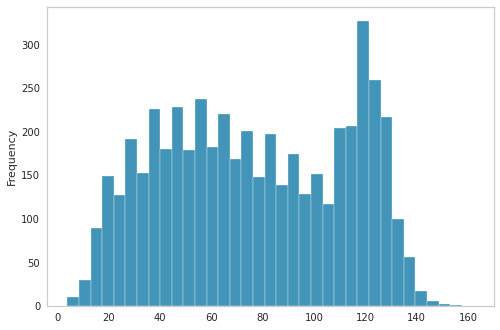

In [267]:
import seaborn as sns
sns.histplot(x=max_token, stat='frequency')

In [268]:
sum(np.array(max_token) < 163) / len(max_token)

1.0

In [269]:
seq_len = 163

## Transformation text to tensor

### Transformation Vectors to Matrices

In [270]:
def transformation(X, seq_len):
  # set array dimensions
  seq_len = seq_len
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [271]:
Xids_train, Xmask_train = transformation(X_train, seq_len)

Xids_test, Xmask_test = transformation(X_test, seq_len)

In [272]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (19244, 163)
Xmask_train.shape : (19244, 163)
Xids_test.shape   : (3397, 163)
Xmask_test.shape  : (3397, 163)


In [273]:
pd.DataFrame(Xids_test)

0         1        2        3         4         5         6    \
0    101.000  2065.000 1996.000 4377.000 16142.000  1010.000  2045.000   
1    101.000  1045.000 2293.000 8416.000  1004.000  2962.000  4253.000   
2    101.000  2044.000 3752.000 2060.000  2111.000  1005.000  1055.000   
3    101.000  2023.000 2003.000 1037.000  2307.000 18785.000  2005.000   
4    101.000  1045.000 2293.000 2023.000  4377.000   999.000  2009.000   
...      ...       ...      ...      ...       ...       ...       ...   
3392 101.000 10966.000 2467.000 2038.000  2081.000  3737.000  5929.000   
3393 101.000  1045.000 3866.000 1996.000  2801.000  2369.000  2023.000   
3394 101.000  2023.000 4377.000 2003.000  1037.000  2147.000  1997.000   
3395 101.000  1045.000 2428.000 4669.000  2023.000  4003.000 10762.000   
3396 101.000  1045.000 2074.000 2293.000  2023.000 18149.000   999.000   

          7         8        9         10        11       12        13   \
0    2003.000  2498.000 2025.000  2000.000  2293.000 2055.000  2009.000   
1    1998.000  2031.000 2023.000  2544.000  1999.000 1037.000  2146.000   
2    4391.000  1010.000 1045.000  2001.000  4452.000 2009.000  2453.000   
3    4201.000  2067.000 5353.000 17828.000  1012.000 1996.000  2503.000   
4    2003.000  6625.000 1998.000  3492.000  1010.000 2092.000  2081.000   
...       ...       ...      ...       ...       ...      ...       ...   
3392 1998.000  1045.000 2018.000  4156.000  1996.000 2168.000  3797.000   
3393 3797.000  2021.000 2009.000  2074.000 17991.000 2105.000  1996.000   
3394 2396.000  2119.000 3784.000  1998.000  1999.000 2711.000  1012.000   
3395 1012.000  2009.000 2003.000  2092.000  2081.000 1998.000  2200.000   
3396 2009.000 16142.000 2092.000  1998.000  2003.000 2428.000 12320.000   

           14       15       16       17        18       19       20   \
0     1012.000 1996.000 3609.000 1010.000  1997.000 3067.000 1010.000   
1    10353.000 2094.000 3797.000 1012.000  2009.000 2003.000 1037.000   
2     2022.000 2205.000 2146.000 1012.000  1045.000 3641.000 1996.000   
3     1997.000 1996.000 4139.000 7840.000  2003.000 3730.000 1010.000   
4     1998.000 4438.000 1012.000 2009.000  7926.000 2646.000 1996.000   
...        ...      ...      ...      ...       ...      ...      ...   
3392  1999.000 2178.000 3609.000 1998.000  1045.000 2359.000 2000.000   
3393  5808.000 2007.000 6197.000 1997.000  4469.000 8313.000 1012.000   
3394  1996.000 3609.000 2003.000 2062.000 17026.000 1999.000 2711.000   
3395  3492.000 1012.000 1045.000 2097.000  4929.000 2009.000 2043.000   
3396  1998.000 3492.000 1012.000 1045.000 12739.000 2009.000 2007.000   

          21        22       23       24        25       26        27   \
0    2003.000  3599.000 2066.000 1996.000 10161.000 1998.000  2034.000   
1    2210.000  3482.000 2100.000 1010.000  2021.000 1996.000  3635.000   
2    3180.000  1060.000 2015.000 2004.000  2035.000 1996.000 20146.000   
3    2066.000 28095.000 3430.000 1010.000  1998.000 2049.000  6625.000   
4    3469.000  2946.000 2174.000 2009.000  2003.000 4011.000  2000.000   
...       ...       ...      ...      ...       ...      ...       ...   
3392 2156.000  2065.000 2027.000 2018.000  2060.000 6087.000  1010.000   
3393 1045.000  8343.000 1996.000 2944.000  1999.000 1996.000  6302.000   
3394 1998.000  2119.000 6087.000 2024.000  3376.000 1012.000  1045.000   
3395 2009.000  4152.000 1037.000 2210.000 14976.000 1999.000  2220.000   
3396 1037.000  9764.000 1998.000 2363.000  7167.000 1997.000 19394.000   

          28       29        30        31       32        33        34   \
0    6302.000 3784.000  1006.000  6748.000 1998.000 26108.000  2084.000   
1    1997.000 1996.000  8313.000  7126.000 2007.000  6865.000  1997.000   
2    1037.000 2020.000  2853.000  2041.000 1012.000  1045.000  2179.000   
3    2438.000 2000.000  3637.000  1999.000 1012.000  2036.000 10140.000   
4    2022.000 2502.000  1012.000  1045.000 2288.000  1037.000  2235.000   
...

In [274]:
pd.DataFrame(Xmask_test)

0     1     2     3     4     5     6     7     8     9     10    11   \
0    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
1    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
2    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
4    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3392 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3393 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3394 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3395 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3396 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   

       12    13    14    15    16    17    18    19    20    21    22    23   \
0    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
1    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
2    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
4    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3392 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3393 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3394 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3395 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3396 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   

       24    25    26    27    28    29    30    31    32    33    34    35   \
0    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
1    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
2    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
4    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3392 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3393 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3394 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3395 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3396 1.000 1.000 1.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 0.000   

       36    37    38    39    40    41    42    43    44    45    46    47   \
0    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
1    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
2    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
4    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3392 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3393 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3394 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3395 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3396 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

       48    49    50    51    52    53    54    55    56    57    58    59   \
0    1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
1  

In [275]:
labels_train = y_train.reshape(-1,1)
labels_test = y_test.reshape(-1,1)

labels_train.shape, labels_test.shape

((19244, 1), (3397, 1))

### Transformation Matrix to Tensor

In [276]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))

dataset_train, dataset_test

(<TensorSliceDataset element_spec=(TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>,
 <TensorSliceDataset element_spec=(TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>)

In [277]:
def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [278]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

## Batch Size

In [279]:
batch_size = 32 # 16, 32

# batch_size 
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size) # Gözlemlerin yeri sabit olduğundan metricler için kullanacağız. 
val_ds = dataset_test.batch(batch_size)

length = len(X_train)
train_ds2 = dataset_train.shuffle(buffer_size = length, reshuffle_each_iteration=True).batch(batch_size) 
# Buffer size boyutu train datasının boyutuyla aynı olduğunda eğitim aşamasında train datası en iyi şekilde karıştırılır.

## Creating Model

In [280]:
bert_model, seq_len

('bert-base-uncased', 163)

In [282]:
def create_model(model, seq_len):
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained(model)
    input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')
    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(seq_len, activation='relu')(embeddings)
    x = tf.keras.layers.Dropout(0.2, name="dropout")(x) #0.1
    # x = tf.keras.layers.BatchNormalization()(x)
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
tf.keras.backend.clear_session()

with strategy.scope():
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.5e-5) #3e-5, 5e-5

  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  precision = tf.keras.metrics.Precision()
  accuracy = tf.keras.metrics.BinaryAccuracy()
  auc = tf.keras.metrics.AUC()
  precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)

  model = create_model(bert_model, seq_len)
  model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy, recall, precision, auc, precision_at_recall])

In [559]:
# Declaring the exponential number
exp_number = "{:e}".format(1.5e-05)

# Converting it to float data type
float_number = "{:f}".format(float(exp_number))

# Printing the converted number
print("Float Number:",float_number)
print("Exponent Number:",exp_number)

Float Number: 0.000015
Exponent Number: 1.500000e-05


In [560]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 163)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 163)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 163,                                           

In [561]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.610610483563904, 1: 2.7601835915088926}

In [562]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode="min", 
                           verbose = 1, patience = 1, restore_best_weights=True)

In [563]:
%%time
history = model.fit(train_ds2, epochs=10, class_weight = class_weights, # batch_size=32, 
                    validation_data = val_ds, callbacks=[early_stop])

Epoch 1/10
602/602 [==============================] - 241s 237ms/step - loss: 0.3370 - binary_accuracy: 0.8412 - recall: 0.8764 - precision: 0.5379 - auc: 0.9279 - precision_at_recall: 0.6063 - val_loss: 0.2583 - val_binary_accuracy: 0.8893 - val_recall: 0.9366 - val_precision: 0.6309 - val_auc: 0.9589 - val_precision_at_recall: 0.7410
Epoch 2/10
602/602 [==============================] - 78s 129ms/step - loss: 0.2276 - binary_accuracy: 0.8961 - recall: 0.9412 - precision: 0.6464 - auc: 0.9650 - precision_at_recall: 0.7751 - val_loss: 0.2725 - val_binary_accuracy: 0.8828 - val_recall: 0.9463 - val_precision: 0.6146 - val_auc: 0.9640 - val_precision_at_recall: 0.7604
Epoch 2: early stopping
CPU times: user 1min 38s, sys: 8.21 s, total: 1min 46s
Wall time: 5min 21s


In [571]:
model.save('/content/drive/MyDrive/03-M2/Proje/Sentiment_Analysis/sentiment_analysis_bert_937.h5')

## Model evaluation

In [564]:
# summary = pd.DataFrame(model.history.history)
summary = pd.DataFrame(history.history)
summary.head()

loss  binary_accuracy  recall  precision   auc  precision_at_recall  \
0 0.337            0.841   0.876      0.538 0.928                0.606   
1 0.228            0.896   0.941      0.646 0.965                0.775   

   val_loss  val_binary_accuracy  val_recall  val_precision  val_auc  \
0     0.258                0.889       0.937          0.631    0.959   
1     0.272                0.883       0.946          0.615    0.964   

   val_precision_at_recall  
0                    0.741  
1                    0.760

In [565]:
# metrics = ['loss', 'recall', 'precision', 'accuracy', 'auc', 'precision_at_recall']
colors  = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history, metrics):
  for n, metric in enumerate(metrics):
    name = str(metric).replace("_"," ").capitalize()
    plt.subplot(3, 2, n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      # plt.ylim(plt.gca().get_ylim())
      plt.ylim([plt.ylim()[0], 1])

    plt.legend();

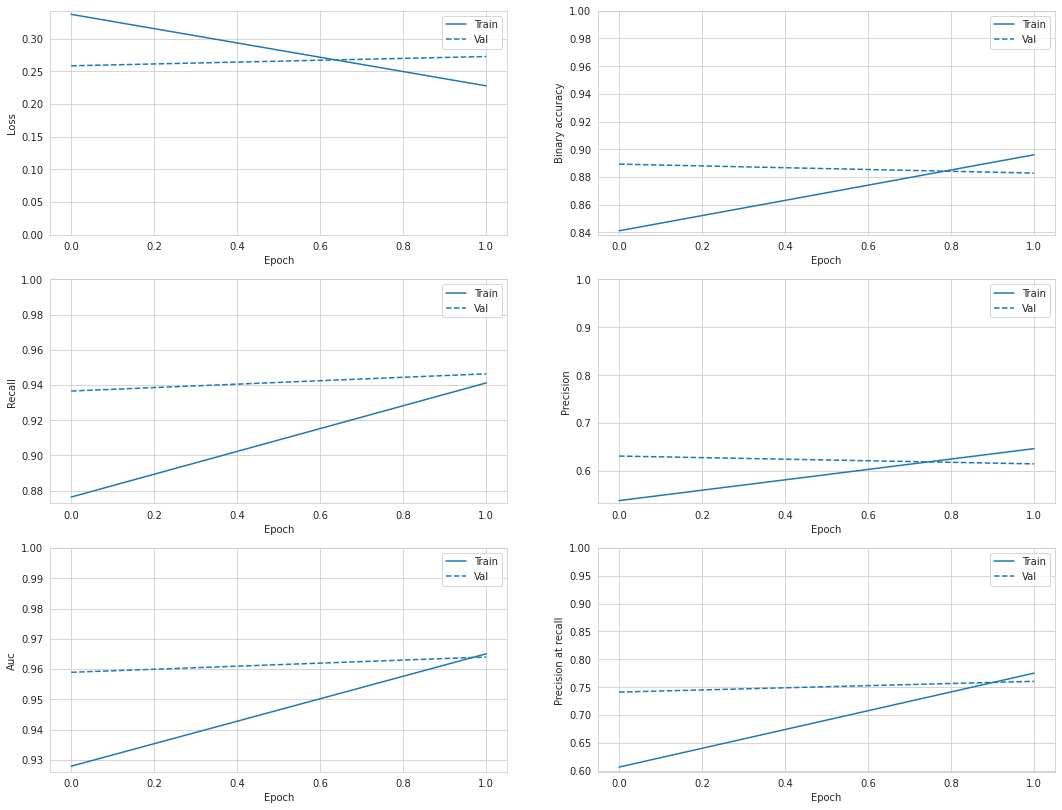

In [566]:
metrics = summary.columns[:6]
plt.figure(figsize=(18,14))
plot_metrics(model.history, metrics=metrics)

In [567]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print('TEST')
y_pred = model.predict(val_ds) >= 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = model.predict(train_ds) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST
107/107 [==============================] - 20s 120ms/step
[[2445  337]
 [  39  576]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2782
           1       0.63      0.94      0.75       615

    accuracy                           0.89      3397
   macro avg       0.81      0.91      0.84      3397
weighted avg       0.92      0.89      0.90      3397

-------------------------------------------------------
TRAIN
602/602 [==============================] - 20s 31ms/step
[[13989  1769]
 [  187  3299]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     15758
           1       0.65      0.95      0.77      3486

    accuracy                           0.90     19244
   macro avg       0.82      0.92      0.85     19244
weighted avg       0.93      0.90      0.91     19244



107/107 [==============================] - 5s 32ms/step


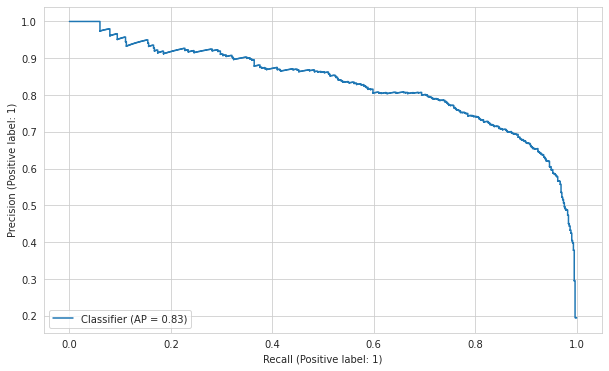

In [568]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

107/107 [==============================] - 5s 31ms/step


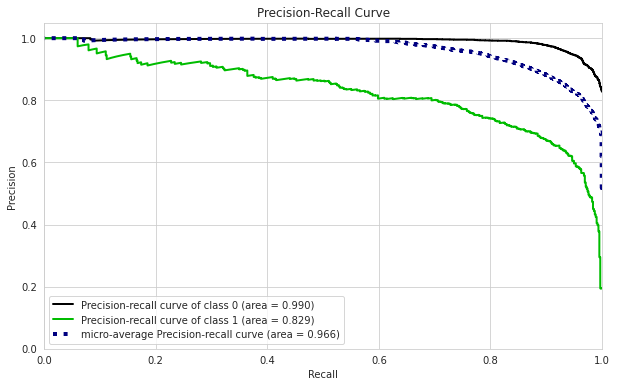

In [569]:
!pip install scikit-plot -q
import scikitplot as skplt

y_pred_proba = model.predict(val_ds)
skplt.metrics.plot_precision_recall(y_test, np.hstack([(1-y_pred_proba), y_pred_proba]))
plt.show()

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


602/602 [==============================] - 219s 365ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2782
           1       0.63      0.94      0.75       615

    accuracy                           0.89      3397
   macro avg       0.81      0.91      0.84      3397
weighted avg       0.92      0.89      0.90      3397


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     15758
           1       0.65      0.95      0.77      3486

    accuracy                           0.90     19244
   macro avg       0.82      0.92      0.85     19244
weighted avg       0.93      0.90      0.91     19244



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
BERT          0.890    0.754        0.937           0.632           0.899   

      f1_train  recall_train  precision_train  
BERT     0.772         0.946            0.652

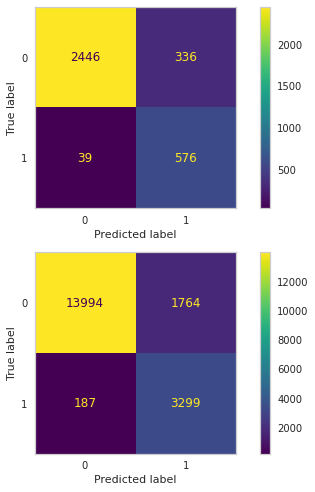

In [288]:
from tensorflow.keras.models import load_model
model_review = load_model('/content/drive/MyDrive/03-M2/Proje/Sentiment_Analysis/sentiment_analysis_bert_937.h5', custom_objects={'CustomModel': create_model(bert_model, seq_len)})

out_score_bert = eval_metric_classification(
    model_review, train_ds, y_train, val_ds, y_test, 
    'BERT', ml_model=False, average=None, labels=[1]
)
out_score_bert

# Compare Models F1 Scores, Recall Scores and Average Precision Score

In [290]:
compare = pd.concat([
    out_score_log, out_score_log_tf,
    out_score_nb, out_score_nb_tf,
    out_score_svc, out_score_svc_tf,
    out_score_rf, out_score_rf_tf,
    out_score_ada, out_score_ada_tf,
    out_score_xgb, out_score_xgb_tf,
    out_score_gru, out_score_gru2,
    out_score_bert
])
compare

accuracy_test  f1_test  recall_test  \
Logistic Regression Count          0.865    0.697        0.854   
Logistic Regression TF             0.844    0.668        0.863   
Naive Bayes Count                  0.828    0.649        0.878   
Naive Bayes TF                     0.853    0.682        0.872   
SVM Count                          0.864    0.692        0.846   
SVM TF                             0.843    0.667        0.867   
Random Forest Count                0.751    0.545        0.826   
Random Forest TF                   0.796    0.595        0.829   
Ada Boosting Count                 0.311    0.332        0.945   
Ada Boosting TF                    0.291    0.329        0.961   
XGBoost Count                      0.838    0.646        0.816   
XGBoost TF                         0.829    0.889        0.837   
GRU Model 1                        0.834    0.664        0.904   
GRU Model 2                        0.764    0.594        0.951   
BERT                               0.890    0.754        0.937   

                           precision_test  accuracy_train  f1_train  \
Logistic Regression Count           0.589           0.896     0.763   
Logistic Regression TF              0.544           0.859     0.696   
Naive Bayes Count                   0.515           0.838     0.668   
Naive Bayes TF                      0.559           0.867     0.711   
SVM Count                           0.586           0.897     0.766   
SVM TF                              0.542           0.857     0.694   
Random Forest Count                 0.407           0.759     0.555   
Random Forest TF                    0.464           0.807     0.614   
Ada Boosting Count                  0.201           0.314     0.336   
Ada Boosting TF                     0.199           0.299     0.335   
XGBoost Count                       0.535           0.858     0.693   
XGBoost TF                          0.948           0.863     0.911   
GRU Model 1                         0.525           0.867     0.723   
GRU Model 2                         0.432           0.797     0.637   
BERT                                0.632           0.899     0.772   

                           recall_train  precision_train  
Logistic Regression Count         0.924            0.650  
Logistic Regression TF            0.893            0.570  
Naive Bayes Count                 0.898            0.532  
Naive Bayes TF                    0.907            0.585  
SVM Count                         0.930            0.651  
SVM TF                            0.898            0.566  
Random Forest Count               0.828            0.417  
Random Forest TF                  0.848            0.481  
Ada Boosting Count                0.956            0.203  
Ada Boosting TF                   0.973            0.202  
XGBoost Count                     0.882            0.570  
XGBoost TF                        0.855            0.975  
GRU Model 1                       0.956            0.581  
GRU Model 2                       0.985            0.471  
BERT                              0.946            0.652

In [296]:
compare.to_csv('/content/drive/MyDrive/03-M2/Proje/Sentiment_Analysis/sentiment_analysis_compare.csv')

## Accuracy Comparison

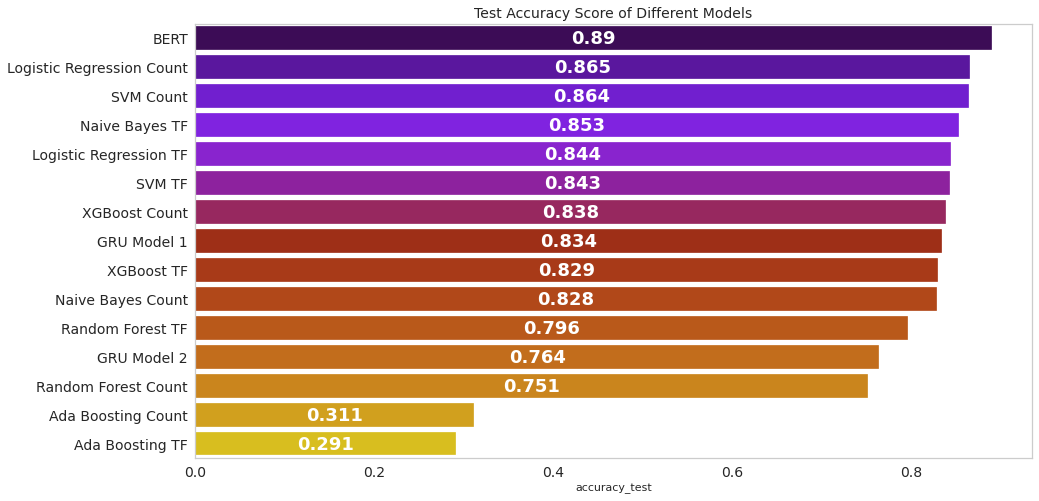

In [291]:
compare = compare.sort_values(by='accuracy_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='accuracy_test', y=compare.index, data=compare.round(3), palette="gnuplot")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Accuracy Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

- Ada Boost and Random Forest have lower accuracy score according to other models.

## Recall Score Comparison

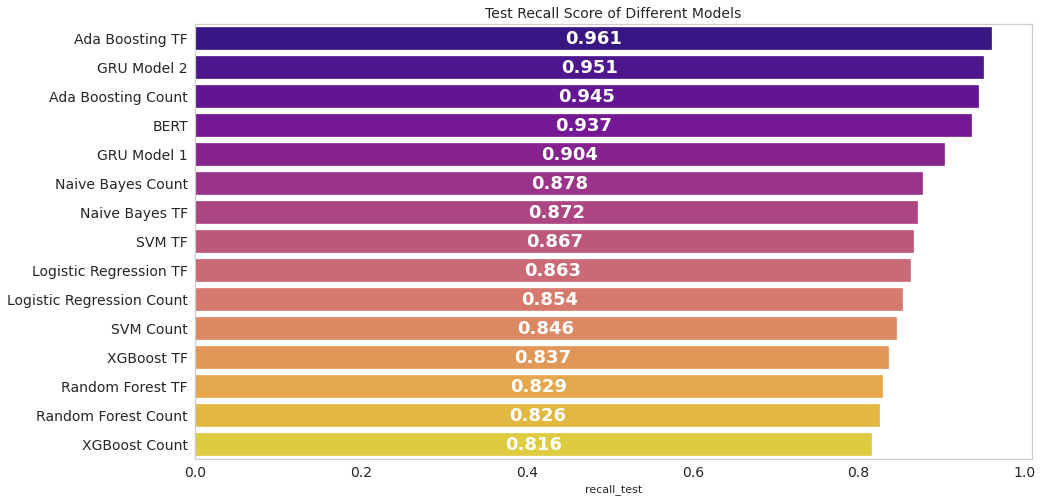

In [293]:
compare = compare.sort_values(by='recall_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='recall_test', y=compare.index, data=compare.round(3), palette="plasma")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Recall Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

- XGBoost has the lowest Recall score, and Ada Boost has the highest Recall score.

## F1 Score Comparison

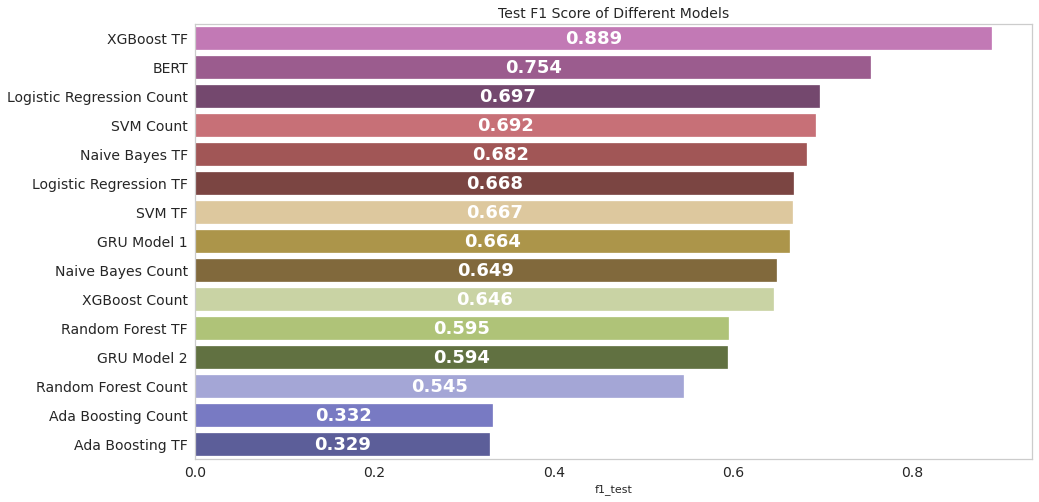

In [294]:
compare = compare.sort_values(by='f1_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='f1_test', y=compare.index, data=compare.round(3), palette="tab20b_r")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test F1 Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

- XGBoost has the highest F1 score, and Ada boost has the lowest f1 score.

## Precision Score Comparison

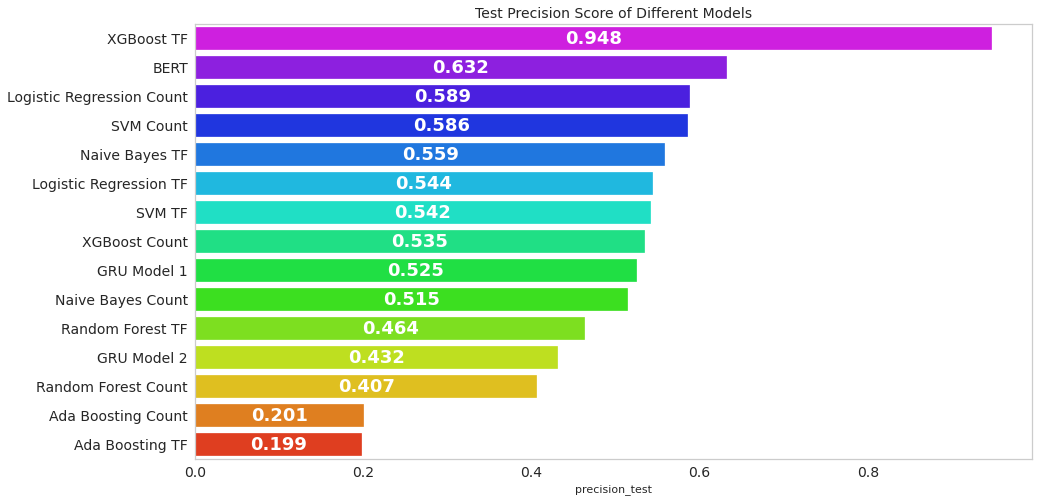

In [295]:
compare = compare.sort_values(by='precision_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='precision_test', y=compare.index, data=compare.round(3), palette="gist_rainbow_r")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Precision Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

- XGBoost has the highest Precision score, and Ada boost has the lowest Precision score.

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___